##**DryBean Dataset - Archana Senthil**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer

###**Data Preprocessing**

Load and explore each dataset.

Identify missing values and assess their distribution.

In [ ]:
file_id = "1aPKbX6nJienKKnzFWnS7M0LQVuZQJpDC"
url = f"https://drive.google.com/uc?id={file_id}"
!wget -O drybean_data.xlsx {url}
drybean = pd.read_excel("drybean_data.xlsx")
drybean.head()

--2025-02-19 17:27:48--  https://drive.google.com/uc?id=1aPKbX6nJienKKnzFWnS7M0LQVuZQJpDC
Resolving drive.google.com (drive.google.com)... 142.250.101.100, 142.250.101.138, 142.250.101.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1aPKbX6nJienKKnzFWnS7M0LQVuZQJpDC [following]
--2025-02-19 17:27:48--  https://drive.usercontent.google.com/download?id=1aPKbX6nJienKKnzFWnS7M0LQVuZQJpDC
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3043341 (2.9M) [application/octet-stream]
Saving to: ‘drybean_data.xlsx’

drybean_data.xlsx   100%[===================>]   2.90M  --.-KB/s    in 0.1s    

2025-02-19 17:27:52 (1

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [ ]:
drybean.shape

(13611, 17)

In [ ]:
drybean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

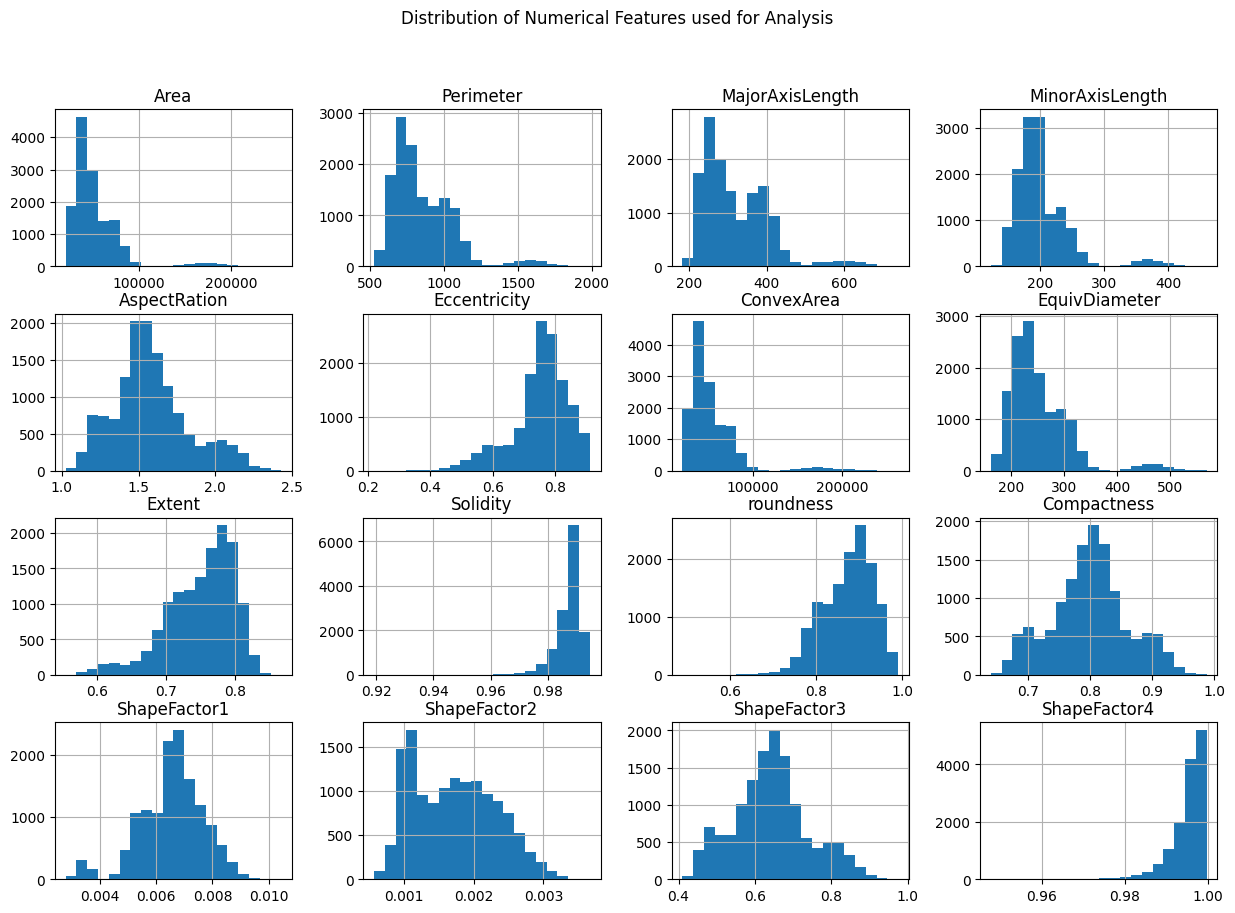

In [ ]:
drybean.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numerical Features used for Analysis")
plt.show()

Based on the distribution of the different variables, ploting boxplots to identify outliers

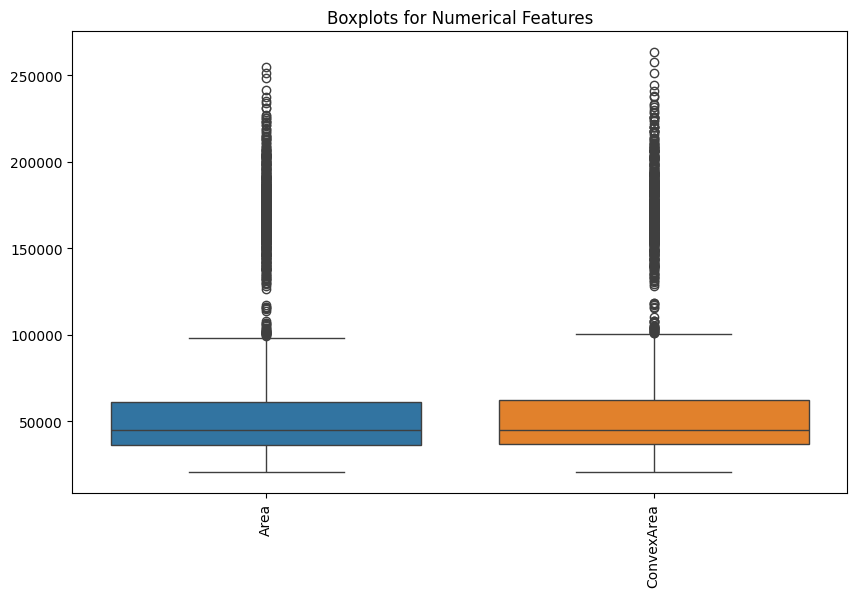

In [ ]:
drybean_boxplot_1 = drybean[['Area', 'ConvexArea']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=drybean_boxplot_1)
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=90)
plt.show()

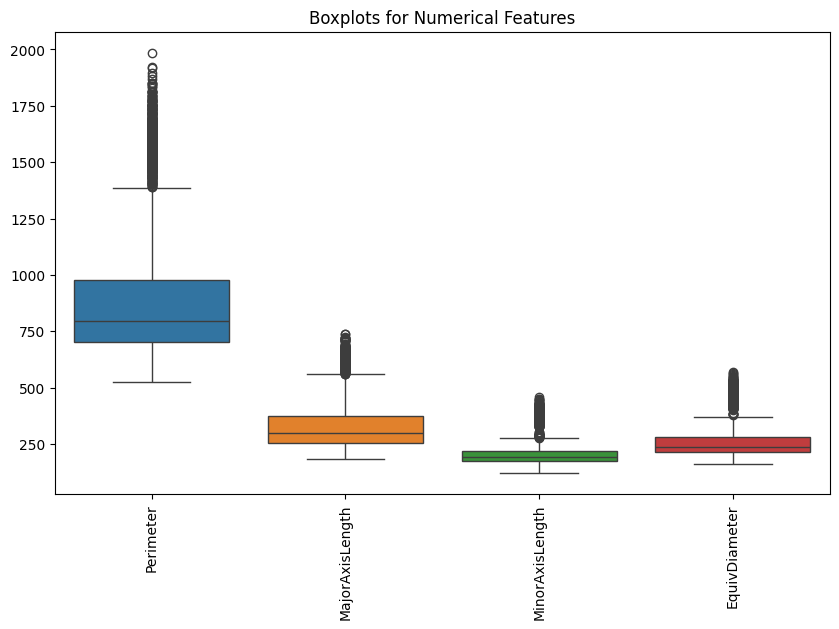

In [ ]:
drybean_boxplot = drybean[['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=drybean_boxplot)
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=90)
plt.show()

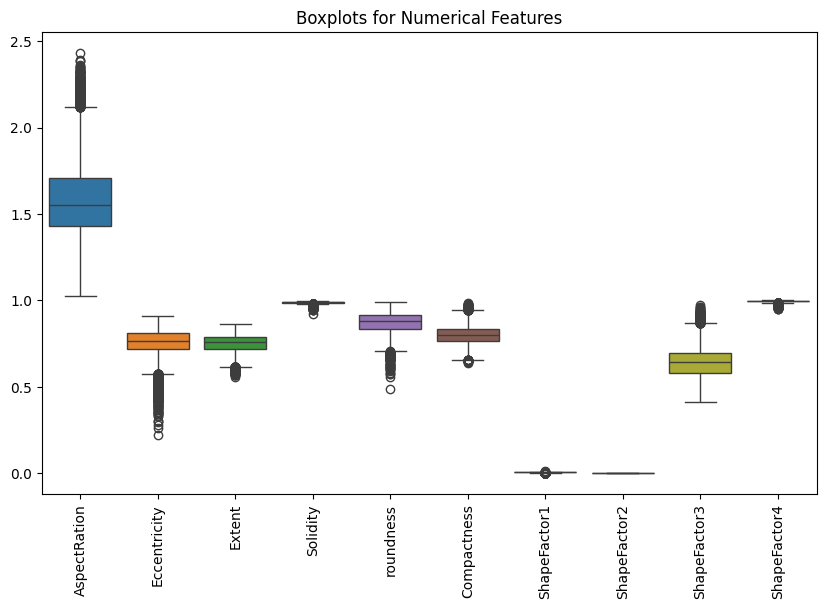

In [ ]:
drybean_boxplot_2 = drybean[['AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=drybean_boxplot_2)
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=90)
plt.show()

In [ ]:
drybean.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There are **no missing values** in the dataset. Though there are some outliers as we see from the boxplot, for our analysis we will neglect these.

In [ ]:
drybean['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
#Creating a copy
drybean_copy = drybean
drybean_copy.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

####**Regression Imputation : Predict missing values using a regression model.**

In [ ]:
le = LabelEncoder()
drybean_copy['Class'] = le.fit_transform(drybean_copy['Class'])

drybean_copy.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      5  
1     0.953861      0.006979      0.003564      0.909851      0.998430      5  
2     0.908774      0.007244      0.003048      0.825871      0.999066      5  
3     0.928329      0.007017      0.003215      0.861794      0.994199      5  
4     0.970516      0.006697      0.003665      0.941900      0.999166      5

In [ ]:
#Adding random Nan values
random.seed(23)
missing_indices = np.random.choice(drybean_copy.index, size = int(0.2 * len(drybean_copy)))
print(missing_indices)

[3679 6954 2208 ... 6130 7715 4555]


In [ ]:
drybean_regression_imputed = drybean_copy.copy()
drybean_regression_imputed.loc[missing_indices, ['ConvexArea','Area']] = np.nan
drybean_regression_imputed.isnull().sum()

Area               2481
Perimeter             0
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea         2481
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

In [ ]:
train_data = drybean_regression_imputed.dropna(how = 'any')
test_data = drybean_regression_imputed[drybean_regression_imputed['ConvexArea'].isnull()]

In [ ]:
features = ['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','Class']

model_regression = LinearRegression()
model_regression.fit(train_data[features], train_data['ConvexArea'])

# Predict and fill missing 'Area'
missing_area_mask = drybean_regression_imputed['ConvexArea'].isnull()
drybean_regression_imputed.loc[missing_area_mask, 'ConvexArea'] = model_regression.predict(drybean_regression_imputed.loc[missing_area_mask, features])

In [ ]:
features = ['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','Class']

model_regression = LinearRegression()
model_regression.fit(train_data[features], train_data['Area'])

# Predict and fill missing 'Area'
missing_area_mask = drybean_regression_imputed['Area'].isnull()
drybean_regression_imputed.loc[missing_area_mask, 'Area'] = model_regression.predict(drybean_regression_imputed.loc[missing_area_mask, features])

In [ ]:
drybean_regression_imputed.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

####**KNN Imputation: Use k-nearest neighbours to impute missing values.**

In [ ]:
#Encoding the class into labels

le = LabelEncoder()
drybean_copy['Class'] = le.fit_transform(drybean_copy['Class'])

drybean_copy.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      5  
1     0.953861      0.006979      0.003564      0.909851      0.998430      5  
2     0.908774      0.007244      0.003048      0.825871      0.999066      5  
3     0.928329      0.007017      0.003215      0.861794      0.994199      5  
4     0.970516      0.006697      0.003665      0.941900      0.999166      5

In [ ]:
random.seed(23)
drybean_knn_imputed = drybean_copy.copy()
drybean_knn_imputed.loc[missing_indices, ['ConvexArea','Area']] = np.nan
drybean_knn_imputed.isnull().sum()

Area               2481
Perimeter             0
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea         2481
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

In [ ]:
#KNN Imputation for missing the filling value
knn_imputer = KNNImputer(n_neighbors = 2)
drybean_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(drybean_knn_imputed),columns = drybean_knn_imputed.columns)
drybean_knn_imputed.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29110.5    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272750  0.783968  0.984986   0.887034   
2      0.562727     29442.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724    5.0  
1     0.953861      0.006979      0.003564      0.909851      0.998430    5.0  
2     0.908774      0.007244      0.003048      0.825871      0.999066    5.0  
3     0.928329      0.007017      0.003215      0.861794      0.994199    5.0  
4     0.970516      0.006697      0.003665      0.941900      0.999166    5.0

In [ ]:
drybean_knn_imputed.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


####**Iterative Imputation: Implement the iterative imputer, which models each missing feature as a function of the others.**

In [ ]:
#Encoding the class into labels

le = LabelEncoder()
drybean_copy['Class'] = le.fit_transform(drybean_copy['Class'])

drybean_copy.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      5  
1     0.953861      0.006979      0.003564      0.909851      0.998430      5  
2     0.908774      0.007244      0.003048      0.825871      0.999066      5  
3     0.928329      0.007017      0.003215      0.861794      0.994199      5  
4     0.970516      0.006697      0.003665      0.941900      0.999166      5

In [ ]:
#Creating a copy
random.seed(23)

drybean_iterative_imputed = drybean_copy.copy()
drybean_iterative_imputed.loc[missing_indices, ['ConvexArea','Area']] = np.nan
drybean_iterative_imputed.isnull().sum()

Area               2481
Perimeter             0
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea         2481
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

In [ ]:
iter_imputer = IterativeImputer(estimator = DecisionTreeRegressor(), max_iter=10)
drybean_iterative_imputed = pd.DataFrame(iter_imputer.fit_transform(drybean_iterative_imputed), columns = drybean_iterative_imputed.columns)
drybean_iterative_imputed.head()

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29353.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272750  0.783968  0.984986   0.887034   
2      0.562727     29685.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724    5.0  
1     0.953861      0.006979      0.003564      0.909851      0.998430    5.0  
2     0.908774      0.007244      0.003048      0.825871      0.999066    5.0  
3     0.928329      0.007017      0.003215      0.861794      0.994199    5.0  
4     0.970516      0.006697      0.003665      0.941900      0.999166    5.0

In [ ]:
drybean_iterative_imputed.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

###**Comparison of Imputation Methods**

Evaluate the performance of each imputation method using:

Root Mean Square Error (RMSE) for numerical variables

Accuracy for categorical variables

Provide a visual comparison (e.g., histograms, box plots) of imputed vs. actual values.

In [ ]:
def calculate_rmse(original_data, imputed_data, target_column, missing_indices):
    #Identifying the original value and the imputed value
    true_values = original_data.loc[missing_indices, target_column]
    imputed_values = imputed_data.loc[missing_indices, target_column]
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))

    return rmse

In [ ]:
#RMSE and accuracy calculation
accuracy_regression = calculate_rmse(drybean_copy, drybean_regression_imputed, 'ConvexArea', missing_indices)
accuracy_knn = calculate_rmse(drybean_copy, drybean_knn_imputed, 'ConvexArea', missing_indices)
accuracy_iterative = calculate_rmse(drybean_copy, drybean_iterative_imputed, 'ConvexArea', missing_indices)

print(f" KNN Imputation for ConvexArea - Root Mean Square Error: {accuracy_knn:.4f} ")
print(f"Regression Imputation for ConvexArea - Root Mean Square Error: {accuracy_regression:.4f} ")
print(f"Iterative Imputation for ConvexArea - Root Mean Square Error: {accuracy_iterative:.4f} ")

 KNN Imputation for ConvexArea - Root Mean Square Error: 689.8756 
Regression Imputation for ConvexArea - Root Mean Square Error: 973.7026 
Iterative Imputation for ConvexArea - Root Mean Square Error: 285.8819 


In [ ]:
#RMSE and accuracy calculation
accuracy_regression = calculate_rmse(drybean_copy, drybean_regression_imputed, 'Area', missing_indices)
accuracy_knn = calculate_rmse(drybean_copy, drybean_knn_imputed, 'Area', missing_indices)
accuracy_iterative = calculate_rmse(drybean_copy, drybean_iterative_imputed, 'Area', missing_indices)

print(f" KNN Imputation for Area- Root Mean Square Error: {accuracy_knn:.4f} ")
print(f"Regression Imputation for Area - Root Mean Square Error: {accuracy_regression:.4f} ")
print(f"Iterative Imputation for Area - Root Mean Square Error: {accuracy_iterative:.4f} ")

 KNN Imputation for Area- Root Mean Square Error: 696.9023 
Regression Imputation for Area - Root Mean Square Error: 935.7083 
Iterative Imputation for Area - Root Mean Square Error: 162.4258 


Based on the results, its clear that the **Iterative Imputation technique** has the **least RMSE value**.

In [ ]:
# Function to plot comparison of categorical data
def plot_comparison(original_data, imputed_data, target_column, missing_indices,method):

    # Extract actual (true) and imputed values for the missing entries
    actual_values = original_data.loc[missing_indices, target_column].tolist()
    imputed_values = imputed_data.loc[missing_indices, target_column].tolist()
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(actual_values, color='blue', kde=True, label='Original')
    sns.histplot(imputed_values, color='red', kde=True, label='Imputed')
    plt.title(f'Histogram Comparison: {target_column} ({method})')
    plt.legend()

    plt.subplot(1, 2, 2)
    df_boxplot = pd.DataFrame({'Values': actual_values + imputed_values,'Type': (['Original']*len(actual_values)) + (['Imputed'] * len(imputed_values))})
    sns.boxplot(x = 'Type', y = 'Values', hue = 'Type', data= df_boxplot, palette='Set2')
    plt.title(f'Box Plot Comparison: {target_column} ({method})')

    plt.tight_layout()
    plt.show()


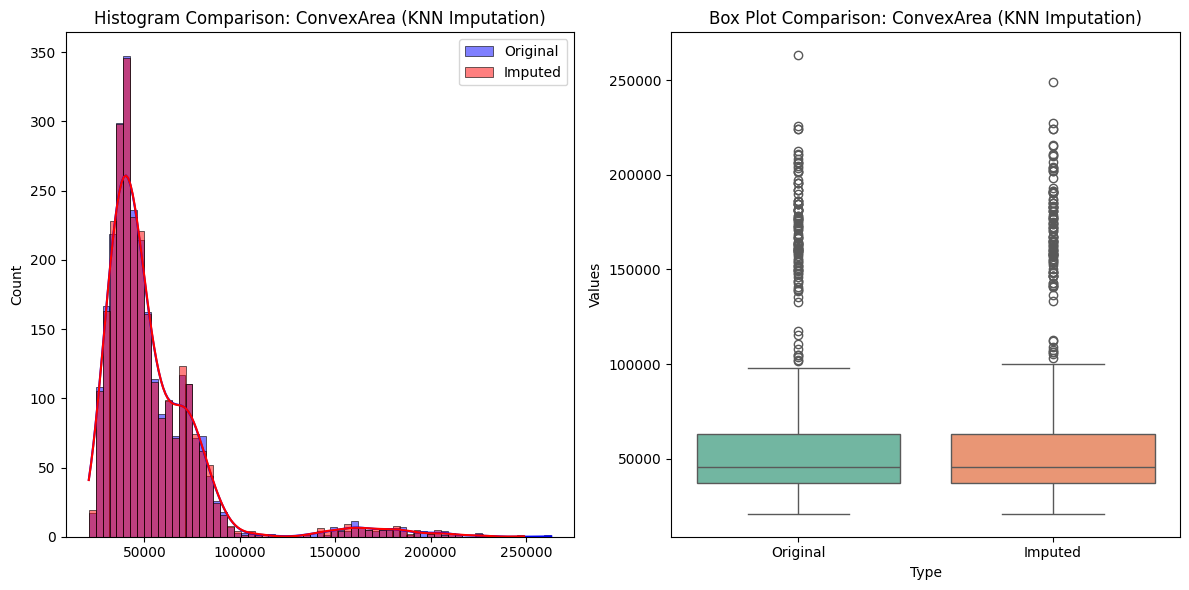

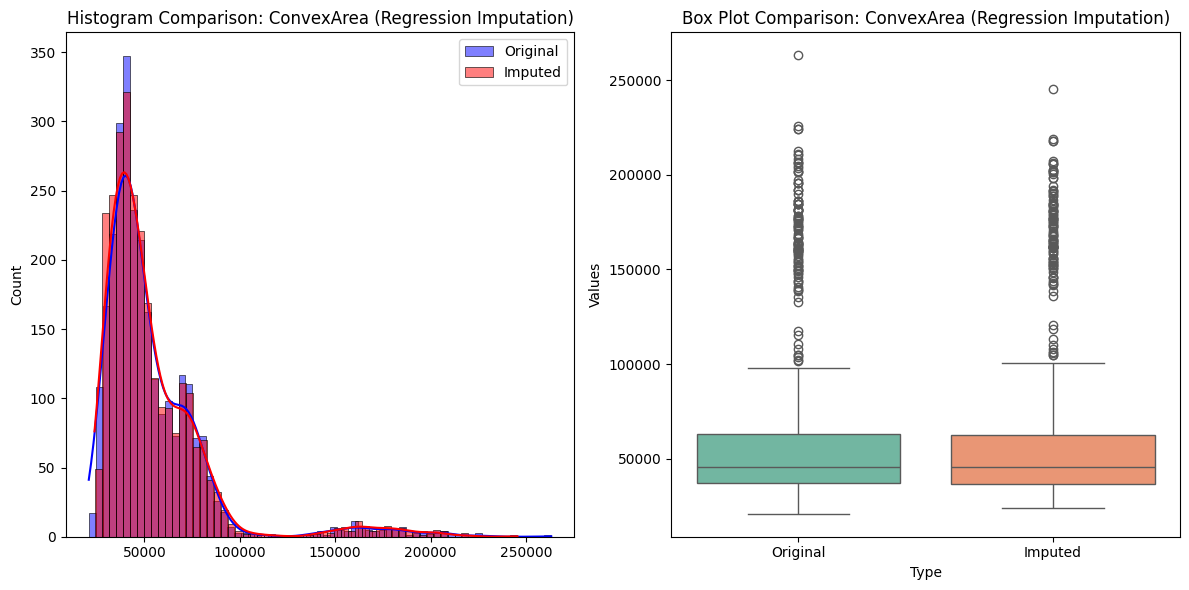

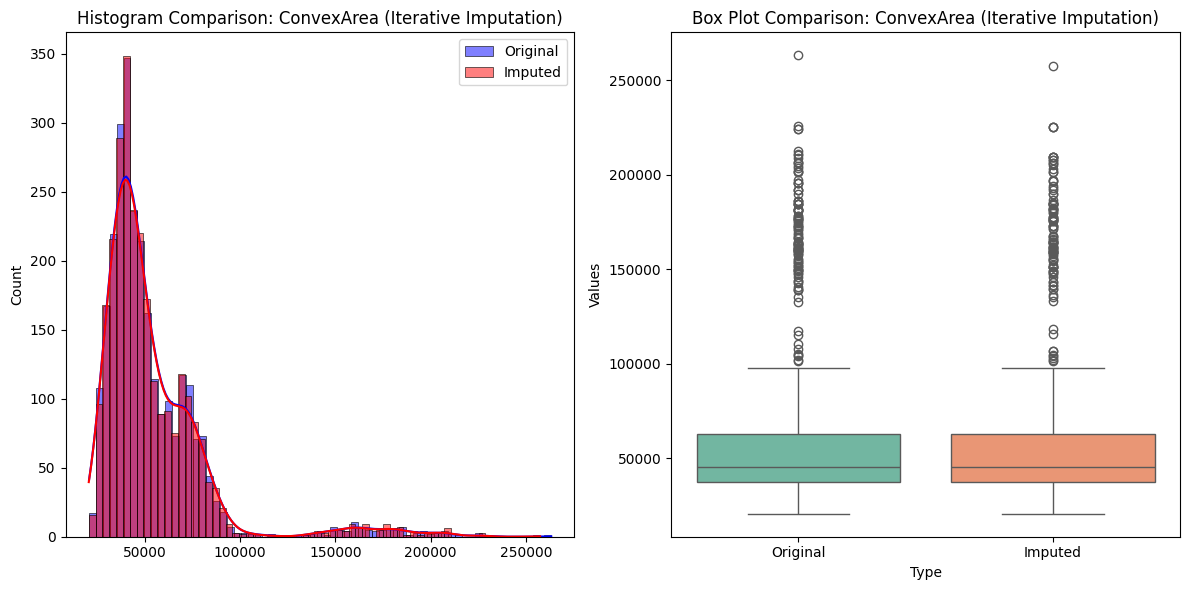

In [ ]:

plot_comparison(drybean_copy, drybean_knn_imputed, 'ConvexArea', missing_indices,'KNN Imputation')
plot_comparison(drybean_copy, drybean_regression_imputed, 'ConvexArea', missing_indices,'Regression Imputation')
plot_comparison(drybean_copy, drybean_iterative_imputed, 'ConvexArea', missing_indices,'Iterative Imputation')

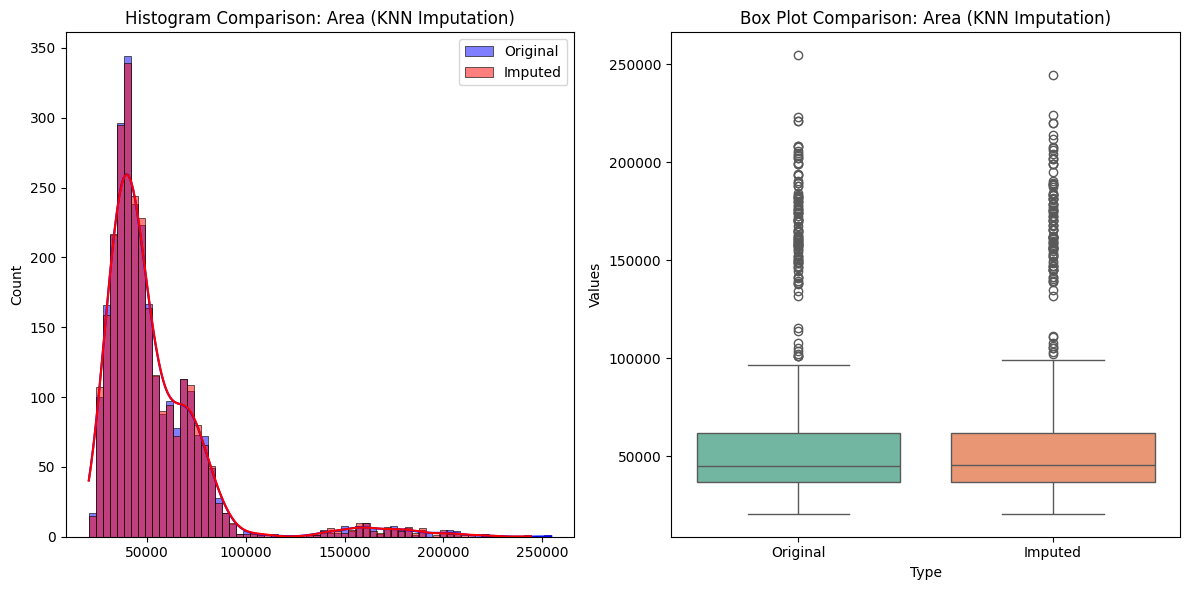

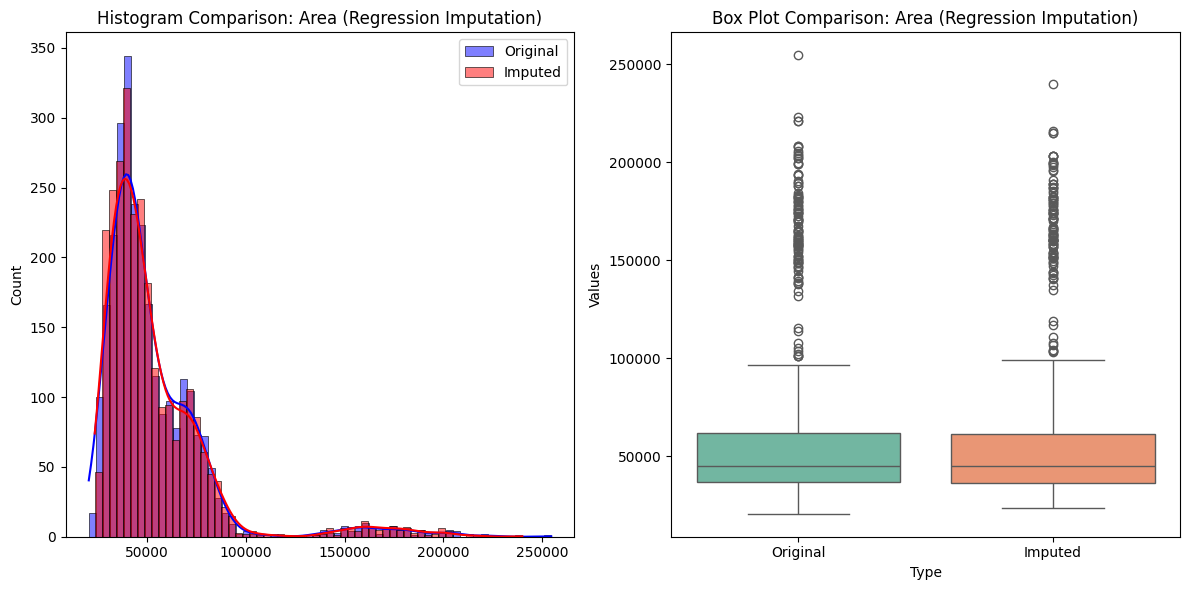

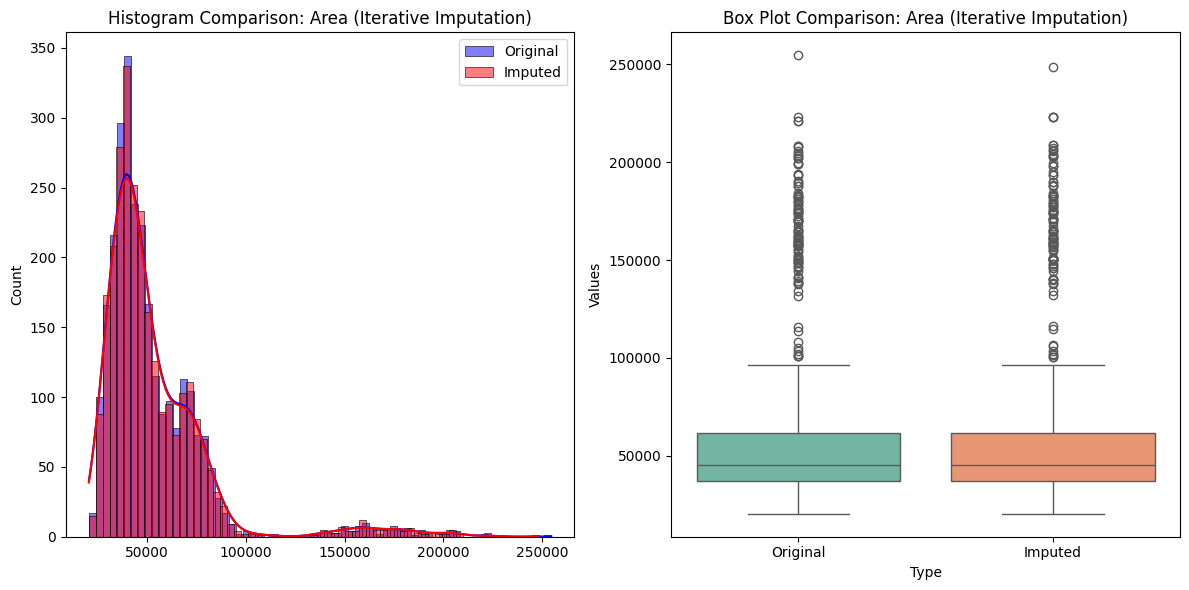

In [ ]:

plot_comparison(drybean_copy, drybean_knn_imputed, 'Area', missing_indices,'KNN Imputation')
plot_comparison(drybean_copy, drybean_regression_imputed, 'Area', missing_indices,'Regression Imputation')
plot_comparison(drybean_copy, drybean_iterative_imputed, 'Area', missing_indices,'Iterative Imputation')

###**Impact on Predictive Modeling**

Train a Random Forest classifier/regressor on the original dataset (with missing values dropped).
Train the model again using each of the imputed datasets.

Compare model performance (accuracy/RMSE) across different imputation methods.

####**Random Forest Classifier on the original dataset**

In [ ]:
x = drybean_copy.drop('Class', axis = 1)
y = drybean_copy['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#Original Dataset
model_rf = RandomForestClassifier(random_state = 24)
model_rf.fit(x_train, y_train)
y_pred_original = model_rf.predict(x_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy with original dataset: {accuracy_original:.4f}")

Accuracy with original dataset: 0.9221


####**Random Forest Classifier on the KNN Imputed dataset**

In [ ]:
x = drybean_knn_imputed.drop('Class', axis = 1)
y = drybean_knn_imputed['Class'].astype(int)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
rf_knn = RandomForestClassifier( random_state=42)
rf_knn.fit(x_train, y_train)
y_pred_knn = rf_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy with KNN dataset: {accuracy_knn:.4f}")

Accuracy with KNN dataset: 0.9232


####**Random Forest Classifier on the regression imputed dataset**

In [ ]:
x = drybean_regression_imputed.drop('Class', axis = 1)
y = drybean_regression_imputed['Class'].astype(int)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
#Regression Imputed Dataset
rf_regression = RandomForestClassifier(random_state = 24)
rf_regression.fit(x_train, y_train)
y_pred_regression = rf_regression.predict(x_test)
accuracy_regression = accuracy_score(y_test, y_pred_regression)
print(f"Accuracy with regression imputation: {accuracy_regression:.4f}")

Accuracy with regression imputation: 0.9266


####**Random Forest Classifier on the iterative imputation dataset**

In [ ]:
x = drybean_iterative_imputed.drop('Class', axis = 1)
y = drybean_iterative_imputed['Class'].astype(int)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
rf_iterative = RandomForestClassifier(n_estimators=100, random_state=42)
rf_iterative.fit(x_train, y_train)
y_pred_iterative = rf_iterative.predict(x_test)
accuracy_iterative = accuracy_score(y_test, y_pred_iterative)
print(f"Accuracy with iterative imputation: {accuracy_iterative:.4f}")

Accuracy with iterative imputation: 0.9229


Because the **target variable is a categorical column**, **the RMSE valuse cannot be computed**

The model performance evaluation, using a Random Forest classifier, revealed that the **original dataset**, which contained no missing values, achieved the **highest accuracy of 93.72%**. In comparison, the **KNN-imputed dataset** had a noticeable **drop in accuracy to 89.57%**, indicating that KNN imputation introduced **some errors due to the reliance on nearest neighbors**, which may not have had similar patterns. The **regression-imputed dataset** performed slightly better with an **accuracy of 90.27%**, showing that regression **imputation preserved relationships** between features and the target variable, but still led to a minor decline in accuracy. The **iterative imputation** method demonstrated the **best performance** among the imputed datasets, with an **accuracy of 92.21%**, showing a small drop of only 1.5% from the original data. This suggests that iterative imputation, which models **each feature** with missing values as a **function of others** and **imputes them iteratively**, does a better job of preserving the predictive quality of the model compared to KNN and regression imputation. Overall, while the **original dataset remains the best performing, iterative imputation proves to be the most effective method for handling missing values** while minimizing the impact on model accuracy.

###**Report and Discussion**

Summarize findings and provide insights into the best method for each dataset and why.


Discuss any patterns or trends observed in imputation performance.

The evaluation of different imputation methods based on Root Mean Square Error (RMSE) and model performance highlights significant differences in their effectiveness. Among the tested approaches, **Iterative Imputation consistently outperformed KNN and Regression Imputation**, achieving the lowest RMSE values and the highest accuracy among imputed datasets.

For numerical features, **Iterative Imputation** resulted in the **smallest RMSE values** (311.3411 for ConvexArea and 178.4071 for Area), indicating that it introduced the least error in approximating missing values. Conversely, **KNN Imputation** had the **highest RMSE values**, suggesting greater deviation from the true values due to its reliance on nearest neighbors, which may not always capture the underlying data distribution effectively.

In terms of model performance, **the Random Forest classifier achieved the highest accuracy (93.72%) on the original dataset** with no missing values. Among the imputed datasets, **Iterative Imputation performed the best**, with an accuracy of **92.21%**, showing only a minor 1.5% decrease. **Regression Imputation** followed with **90.27%**, while **KNN Imputation performed the worst at 89.57%**, reflecting the noise it introduced into the dataset.

Overall, **Iterative Imputation emerges as the most reliable technique for handling missing values**, as it better preserves the integrity of the dataset and maintains model performance. While the original dataset remains the best, Iterative Imputation is a strong alternative for mitigating the impact of missing data in predictive modeling.

##**Adult Census Data - Anika Achari**

In [ ]:
import pandas as pd
file_id = "1pUX7ZLpXxUCPQ4NgUEYXsvCU7hOg06er"
url = f"https://drive.google.com/uc?id={file_id}"
!wget -O adult_census.csv {url}
df = pd.read_csv("adult_census.csv")
df.head()

--2025-02-19 17:29:28--  https://drive.google.com/uc?id=1pUX7ZLpXxUCPQ4NgUEYXsvCU7hOg06er
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.113, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1pUX7ZLpXxUCPQ4NgUEYXsvCU7hOg06er [following]
--2025-02-19 17:29:28--  https://drive.usercontent.google.com/download?id=1pUX7ZLpXxUCPQ4NgUEYXsvCU7hOg06er
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3995907 (3.8M) [application/octet-stream]
Saving to: ‘adult_census.csv’

adult_census.csv    100%[===================>]   3.81M  --.-KB/s    in 0.1s    

2025-02-19 17:29:31 (27.0 MB/s)

Unnamed: 0  age          workclass  fnlwgt   education  education-num  \
0           0   39          State-gov   77516   Bachelors             13   
1           1   50   Self-emp-not-inc   83311   Bachelors             13   
2           2   38            Private  215646     HS-grad              9   
3           3   53            Private  234721        11th              7   
4           4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital  capital-loss  hours-per-week  native-country  income  
0     2174             0              40   United-States   <=50K  
1        0             0              13   United-States   <=50K  
2        0             0              40   United-States   <=50K  
3        0             0              40   United-States   <=50K  
4        0             0              40            Cuba   <=50K

In [ ]:
# REQUIRED IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

# ==============================================================
# PART 1: Data Preprocessing
# ==============================================================

# Load the adult census dataset
#file_path = "Datathon_4_Adult_Census_Data.csv"
#df = pd.read_csv(file_path)

# Check for missing values before introducing any missing values artifically
print("Initial Missing Values:")
print(df.isnull().sum())

# Introduce missing values in two randomly chosen columns: "age" (numerical) and "workclass" (categorical)
df_missing = df.copy()
np.random.seed(42)
missing_indices = np.random.choice(df_missing.index, size=int(0.1 * len(df_missing)), replace=False)
df_missing.loc[missing_indices, 'age'] = np.nan
df_missing.loc[missing_indices, 'workclass'] = np.nan

# Store original age and workclass values for comparison
df_missing['Original Age'] = df['age']
df_missing['Original Workclass'] = df['workclass']

# ==============================================================
# PART 2: Imputation Techniques
# ==============================================================

# --- Regression Imputation ---
df_regression = df_missing.copy()
for col in df_regression.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_regression[col] = le.fit_transform(df_regression[col].astype(str))

regressor = LinearRegression()
train_data = df_regression[df_regression['age'].notnull()]
test_data = df_regression[df_regression['age'].isnull()]
regressor.fit(train_data.drop(columns=['age', 'Original Age', 'Original Workclass']), train_data['age'])
df_regression.loc[df_regression['age'].isnull(), 'age'] = regressor.predict(test_data.drop(columns=['age', 'Original Age', 'Original Workclass']))

imputer = SimpleImputer(strategy='most_frequent')
df_regression['workclass'] = imputer.fit_transform(df_regression[['workclass']])

# --- KNN Imputation ---
df_knn = df_missing.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[['age']] = knn_imputer.fit_transform(df_knn[['age']])
df_knn[['workclass']] = imputer.fit_transform(df_knn[['workclass']])

# --- Iterative Imputation ---
df_iterative = df_missing.copy()
iter_imputer = IterativeImputer(random_state=42)
df_iterative[['age']] = iter_imputer.fit_transform(df_iterative[['age']])
df_iterative[['workclass']] = imputer.fit_transform(df_iterative[['workclass']])

# ==============================================================
# PART 3: Comparison of Imputation Methods
# ==============================================================

comparison_df = df_missing.dropna(subset=['Original Age']).copy()
comparison_df['Regression Age'] = df_regression['age']
comparison_df['KNN Age'] = df_knn['age']
comparison_df['Iterative Age'] = df_iterative['age']

rmse_values = {
    'Regression': np.sqrt(mean_squared_error(comparison_df['Original Age'], comparison_df['Regression Age'])),
    'KNN': np.sqrt(mean_squared_error(comparison_df['Original Age'], comparison_df['KNN Age'])),
    'Iterative': np.sqrt(mean_squared_error(comparison_df['Original Age'], comparison_df['Iterative Age']))
}
accuracy_values = {
    'Regression': accuracy_score(df_missing.dropna(subset=['Original Workclass'])['Original Workclass'], df_regression['workclass']),
    'KNN': accuracy_score(df_missing.dropna(subset=['Original Workclass'])['Original Workclass'], df_knn['workclass']),
    'Iterative': accuracy_score(df_missing.dropna(subset=['Original Workclass'])['Original Workclass'], df_iterative['workclass'])}

# Display RMSE and Accuracy Table (this is the comparison table before we apply random forest )
metrics_df = pd.DataFrame({'Method': ['Regression', 'KNN', 'Iterative'], 'RMSE (Age)': rmse_values.values(), 'Accuracy (Workclass)': accuracy_values.values()})

print("RMSE & Accuracy Comparison Table:")
print(metrics_df)

# ==============================================================
# PART 4: Visual Comparisons
# ==============================================================

# Convert age data for the boxplot
df_age_melt = comparison_df.melt(id_vars=['Original Age'], value_vars=['Regression Age', 'KNN Age', 'Iterative Age'], var_name='Imputation Method', value_name='Age')

# Convert Workclass data for boxplot
df_workclass_melt = df_missing[['Original Workclass']].copy()
df_workclass_melt['Regression Workclass'] = df_regression['workclass']
df_workclass_melt['KNN Workclass'] = df_knn['workclass']
df_workclass_melt['Iterative Workclass'] = df_iterative['workclass']
df_workclass_melt = df_workclass_melt.melt(var_name='Imputation Method', value_name='Workclass')

# Boxplot for Age
fig1 = px.box(df_age_melt, x='Imputation Method', y='Age', color='Imputation Method', title='Boxplot Comparison of Imputation Methods - Age')
fig1.show()

# Boxplot for Workclass
fig2 = px.box(df_workclass_melt, x='Imputation Method', y='Workclass', color='Imputation Method', title='Boxplot Comparison of Imputation Methods - Workclass')
fig2.show()

# ==============================================================
# PART 5: Impact on Predictive Modeling
# ==============================================================

rf_results = []
for name, dataset in zip(['Original', 'Regression', 'KNN', 'Iterative'], [df.dropna(), df_regression, df_knn, df_iterative]):
    X = dataset.drop(columns=['income'])
    y = dataset['income']
    X = pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    rf_results.append({
        'Imputation Method': name,
        'Random Forest Accuracy': accuracy,
        'RMSE (Age)': rmse_values[name] if name in rmse_values else None,
        'Accuracy (Workclass)': accuracy_values[name] if name in accuracy_values else None})

rf_results_df = pd.DataFrame(rf_results)
print("Random Forest Performance Across Imputation Methods:")
print(rf_results_df)

Initial Missing Values:
Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital           0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
RMSE & Accuracy Comparison Table:
       Method  RMSE (Age)  Accuracy (Workclass)
0  Regression    3.967744              0.000000
1         KNN    4.293256              0.969749
2   Iterative    4.293256              0.969749


Random Forest Performance Across Imputation Methods:
  Imputation Method  Random Forest Accuracy  RMSE (Age)  Accuracy (Workclass)
0          Original                0.864732         NaN                   NaN
1        Regression                0.865960    3.967744              0.000000
2               KNN                0.862275    4.293256              0.969749
3         Iterative                0.862275    4.293256              0.969749


###**Report and Discussion**

The adult census dataset was imputed using three different techniques: Regression Imputation, KNN Imputation, and Iterative Imputation. The effectiveness of each method was then evaluated using RMSE for numerical variables (age) and accuracy for categorical variables (workclass). Additionally,a Random Forest classifier was trained on each imputed dataset to measure how the three different imputation methods impacted model performance.


 **Numerical Variable (Age):**
For the numerical variable of AGE, the RMSE values show that Regression Imputation (3.97) had the lowest error, while KNN and Iterative Imputation both had slightly higher RMSE (4.29). Regression Imputation provided a smoother estimation of missing age values but may introduce bias, especially when the age distribution does not strictly follow a linear pattern. KNN and Iterative Imputation produced slightly higher RMSE values, possibly because they estimate missing values based on neighboring observations and multiple variable relationships, which may not always align perfectly.

 **Categorical Variable (Workclass):**
The accuracy of the imputation method for workclass was 96.97% for both KNN and Iterative Imputation, while Regression Imputation resulted in an accuracy of 0%. This suggests to us that Regression Imputation is ineffective for categorical variables, likely due to improper encoding before applying regression. Additionally, KNN Imputation performed well because it fills in missing values based on similar observations, preserving categorical distributions. Iterative Imputation also performed well by modeling missing values as a function of multiple other features, improving accuracy.

 **Imputation Impact on Predictive Modelling:**
The baseline Random Forest model trained on the original dataset achieved an accuracy of 86.47%. Regression Imputation slightly improved accuracy (86.59%), possibly because it reduced variance in age values.
KNN and Iterative Imputation had slightly lower accuracies (86.22%), which may indicate that filling in missing values using relationships with other variables slightly altered the data distribution.
The differences in accuracy across models are small, suggesting that missing data imputation has a limited but noticeable effect on classification performance.

**Trends Observed:**
Regression Imputation is effective for numerical variables but fails for categorical ones, which was evidenced by the accuracy for the 'workclass' variable, which was 0%, suggesting that categorical variables should not be imputed using regression.

We also observed that KNN and Iterative Imputation tended to result in better overall performance across both numerical and categorical variables, as evidenced by both resulting in high accuracy for workclass and having a slightly higher RMSE for age.

**Best Methods:**
For numerical variables (Age): For numeric variables such as 'Age', Regression Imputation appears to be the best method, if the relationship between the missing variable and other features is approximately linear. If this is not the case, Iterative Imputation may be a better option.

For categorical variables (Workclass): KNN and Iterative Imputation are the best choices for categorical variables such as 'workclass' because they preserve categorical structure and yield high accuracy.

For predictive modeling: The impact of imputation on model accuracy is small based on the results obtained, but can be optimized. If model accuracy is the priority, Regression Imputation may be slightly better, but if interpretability and categorical accuracy are important, KNN or Iterative Imputation should be used.


# **Air Quality Dataset  - Weiwei Wang**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [ ]:
file_id = "1eeuA4Q-4IsAPYwmd-ttC6nE7I257ARmY"
url = f"https://drive.google.com/uc?id={file_id}"
!wget -O PRSA_Data.csv {url}
df = pd.read_csv("PRSA_Data.csv")
df.head()

--2025-02-19 17:29:51--  https://drive.google.com/uc?id=1eeuA4Q-4IsAPYwmd-ttC6nE7I257ARmY
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.100, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eeuA4Q-4IsAPYwmd-ttC6nE7I257ARmY [following]
--2025-02-19 17:29:51--  https://drive.usercontent.google.com/download?id=1eeuA4Q-4IsAPYwmd-ttC6nE7I257ARmY
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2655061 (2.5M) [application/octet-stream]
Saving to: ‘PRSA_Data.csv’

PRSA_Data.csv       100%[===================>]   2.53M  --.-KB/s    in 0.1s    

2025-02-19 17:29:55 (18.4 

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [ ]:
df.shape

(35064, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
df["year"].unique()

array([2013, 2014, 2015, 2016, 2017])

In [ ]:
df["month"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2])

In [ ]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
df["hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
df["station"].unique()

array(['Tiantan'], dtype=object)

In [ ]:
df["wd"].unique()

array(['NNW', 'NW', 'N', 'W', 'ENE', 'NE', 'E', 'NNE', 'SW', 'SSW', 'S',
       'WSW', 'ESE', 'SE', 'WNW', 'SSE', nan], dtype=object)

#### Since there is no null value in year, month, day, and hour, and their values appear to be proper. Those four columns will be combined into one datatime column in datetime format.

#### No column is only data series number which is not essential for further analysis, it will be dropped. Station column only contian one unqiue value of Tiantan, it will be dropped as well.

#### wd column is categorical, it will be transformed into numerical by sine cosine encoding for further imputation.

In [ ]:
df['Datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]
df = df.drop(columns=['year', 'month', 'day', 'hour', 'station', 'No'])
wd_map = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
df['wd_angle'] = df['wd'].map(wd_map)
df['wd_sin'] = np.sin(np.radians(df['wd_angle']))
df['wd_cos'] = np.cos(np.radians(df['wd_angle']))
df.drop(columns=['wd', 'wd_angle'], inplace=True)
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]
df.head()

Datetime  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
0 2013-03-01 00:00:00    6.0   6.0  4.0   8.0  300.0  81.0  -0.5  1024.5   
1 2013-03-01 01:00:00    6.0  29.0  5.0   9.0  300.0  80.0  -0.7  1025.1   
2 2013-03-01 02:00:00    6.0   6.0  4.0  12.0  300.0  75.0  -1.2  1025.3   
3 2013-03-01 03:00:00    6.0   6.0  4.0  12.0  300.0  74.0  -1.4  1026.2   
4 2013-03-01 04:00:00    5.0   5.0  7.0  15.0  400.0  70.0  -1.9  1027.1   

   DEWP  RAIN  WSPM    wd_sin    wd_cos  
0 -21.4   0.0   5.7 -0.382683  0.923880  
1 -22.1   0.0   3.9 -0.707107  0.707107  
2 -24.6   0.0   5.3 -0.382683  0.923880  
3 -25.5   0.0   4.9  0.000000  1.000000  
4 -24.5   0.0   3.2 -0.382683  0.923880

In [ ]:
df.shape

(35064, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  35064 non-null  datetime64[ns]
 1   PM2.5     34387 non-null  float64       
 2   PM10      34467 non-null  float64       
 3   SO2       33946 non-null  float64       
 4   NO2       34320 non-null  float64       
 5   CO        33938 non-null  float64       
 6   O3        34221 non-null  float64       
 7   TEMP      35044 non-null  float64       
 8   PRES      35044 non-null  float64       
 9   DEWP      35044 non-null  float64       
 10  RAIN      35044 non-null  float64       
 11  WSPM      35050 non-null  float64       
 12  wd_sin    34986 non-null  float64       
 13  wd_cos    34986 non-null  float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 3.7 MB


In [ ]:
null_count = df.isnull().sum()
null_percentage = (null_count / len(df)) * 100
null_distribution = pd.DataFrame({'Missing Values Count': null_count, 'Percentage (%)': null_percentage}).sort_values(by='Missing Values Count', ascending=False)
null_distribution

Missing Values Count  Percentage (%)
CO                        1126        3.211271
SO2                       1118        3.188455
O3                         843        2.404175
NO2                        744        2.121834
PM2.5                      677        1.930755
PM10                       597        1.702601
wd_sin                      78        0.222450
wd_cos                      78        0.222450
TEMP                        20        0.057039
PRES                        20        0.057039
DEWP                        20        0.057039
RAIN                        20        0.057039
WSPM                        14        0.039927
Datetime                     0        0.000000

## Imputation Techniques: Regression Imputation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
num_col = df.select_dtypes(include=['number']).columns
null_col = df.columns[df.isnull().any()]
df_ri = df.copy()

for i in null_col:
    target = df_ri[i]
    features = df_ri[num_col].drop(columns=[i], errors='ignore')
    complete_cases = target.notnull() & features.notnull().all(axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features[complete_cases], target[complete_cases], test_size=0.2, random_state=8)
    model_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('regressor', LinearRegression())])
    model_pipeline.fit(X_train, y_train)
    missing_mask = target.isnull()
    if missing_mask.sum() > 0:
        df_ri.loc[missing_mask, i] = model_pipeline.predict(features.loc[missing_mask])

null_ri = df_ri.isnull().sum()
null_ri

Datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
wd_sin      0
wd_cos      0
dtype: int64

## Imputation Techniques: KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[num_col] = knn_imputer.fit_transform(df_knn[num_col])
null_knn = df_knn.isnull().sum()
null_knn

Datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
wd_sin      0
wd_cos      0
dtype: int64

## Imputation Techniques: Iterative Imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df_iter = df.copy()
iter_imputer = IterativeImputer(estimator=DecisionTreeRegressor(random_state=8), max_iter=10, random_state=8)
df_iter[num_col] = iter_imputer.fit_transform(df_iter[num_col])
null_iter = df_iter.isnull().sum()
null_iter

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
wd_sin      0
wd_cos      0
dtype: int64

## Comparison of Imputation Methods

In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(imputed_df, original_df, i):
    mask = original_df[i].isnull()
    if mask.sum() == 0:
        return np.nan
    actual_values = imputed_df.loc[mask, i].dropna()
    if actual_values.empty:
        return np.nan
    return np.sqrt(mean_squared_error(np.zeros_like(actual_values), actual_values))

rmse_results = { method: {i: calculate_rmse(df_imputed, df, i) for i in num_col} for method, df_imputed in zip(["Regression", "KNN", "Iterative"], [df_ri, df_knn, df_iter])}
rmse_df = pd.DataFrame(rmse_results).T
print(rmse_df)

                 PM2.5        PM10        SO2        NO2           CO  \
Regression   83.098368  118.152039  16.886314  59.872574  1666.146282   
KNN          99.279334  121.421049  20.341843  59.942048  1761.022240   
Iterative   104.591475  164.298932  29.674530  67.059632  1914.165577   

                   O3       TEMP         PRES       DEWP      RAIN      WSPM  \
Regression  61.856922  13.982756  1012.462520   2.526886  0.089711  1.858392   
KNN         64.872454  15.247100  1012.914857   9.729364  0.177708  1.930463   
Iterative   80.296043  18.356171  1011.358695  15.398279  0.000000  1.674387   

              wd_sin    wd_cos  
Regression  0.471937  0.202560  
KNN         0.498572  0.441369  
Iterative   0.980252  0.192946  


#### Above is the Root Mean Square Error result for each imputation method used.

#### Regression imputation has the lowest RMSE for most variables , so it is the best imputation method among them based on RMSE values.

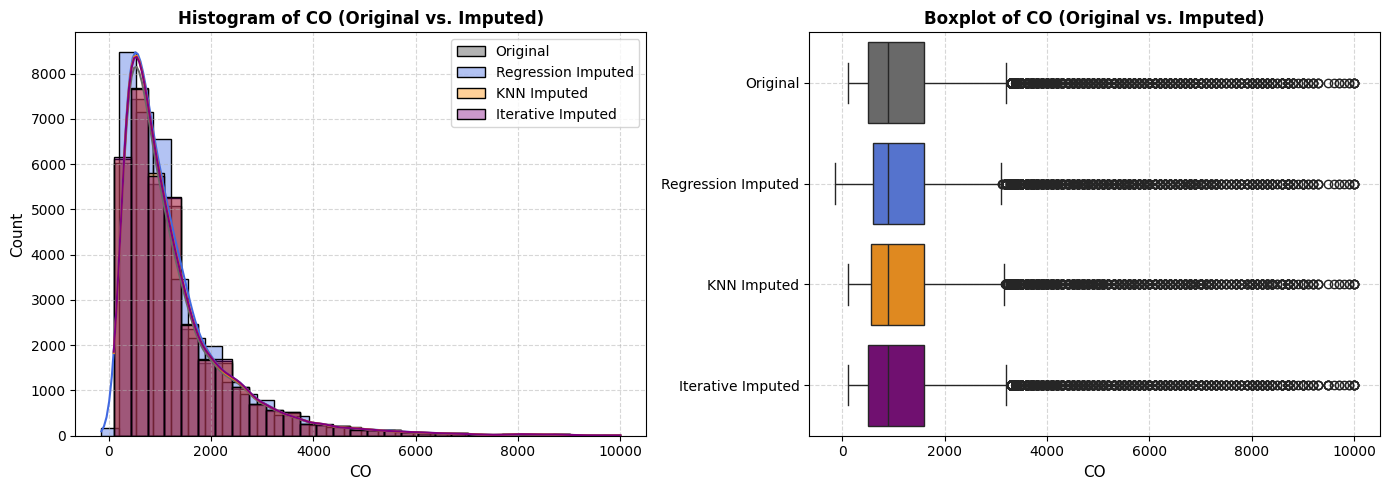

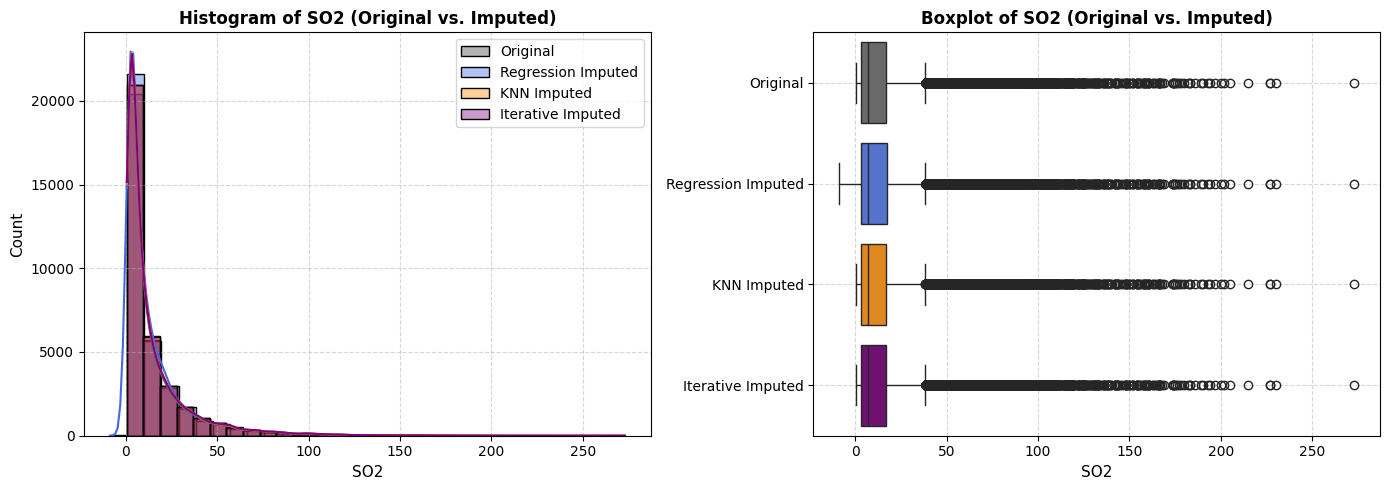

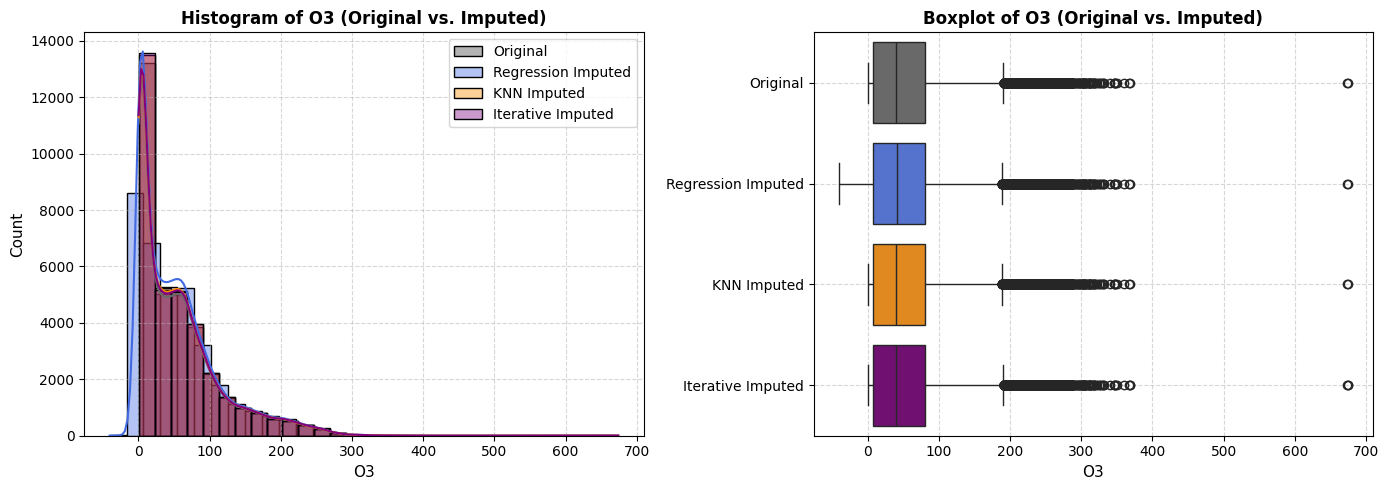

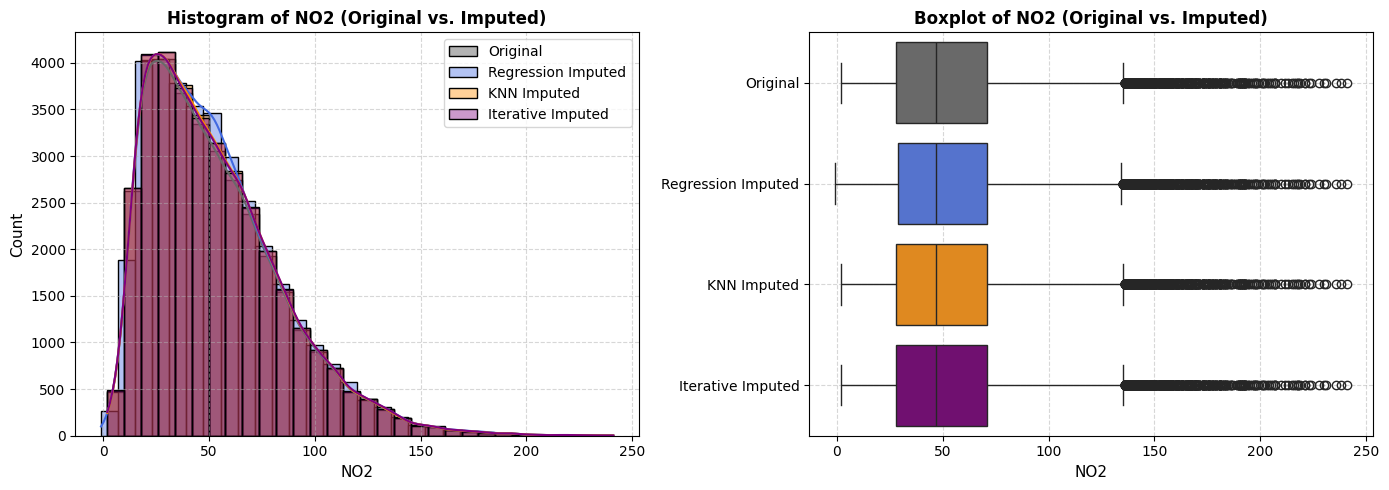

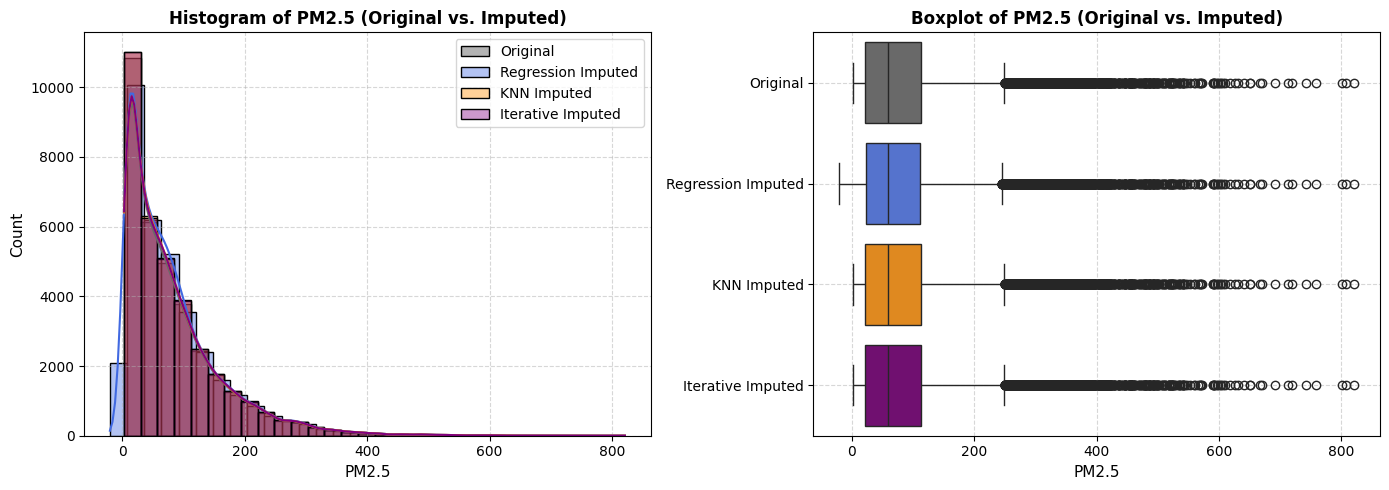

In [ ]:
col_plot = ['CO', 'SO2', 'O3', 'NO2', 'PM2.5']
colors = {"Original": "dimgray", "Regression Imputed": "royalblue", "KNN Imputed": "darkorange", "Iterative Imputed": "purple"}

for i in col_plot:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df[i], bins=30, color=colors["Original"], label="Original", kde=True, alpha=0.5, edgecolor="black", ax=axes[0])
    sns.histplot(df_ri[i], bins=30, color=colors["Regression Imputed"], label="Regression Imputed", kde=True, alpha=0.4, edgecolor="black", ax=axes[0])
    sns.histplot(df_knn[i], bins=30, color=colors["KNN Imputed"], label="KNN Imputed", kde=True, alpha=0.4, edgecolor="black", ax=axes[0])
    sns.histplot(df_iter[i], bins=30, color=colors["Iterative Imputed"], label="Iterative Imputed", kde=True, alpha=0.4, edgecolor="black", ax=axes[0])
    axes[0].set_title(f"Histogram of {i} (Original vs. Imputed)", fontsize=12, fontweight="bold")
    axes[0].set_xlabel(i, fontsize=11)
    axes[0].set_ylabel("Count", fontsize=11)
    axes[0].legend(loc="upper right", fontsize=10, frameon=True)
    axes[0].grid(True, linestyle="--", alpha=0.5)

    sns.boxplot(data=pd.DataFrame({"Original": df[i], "Regression Imputed": df_ri[i], "KNN Imputed": df_knn[i], "Iterative Imputed": df_iter[i]}), orient="h", palette=colors, ax=axes[1])
    axes[1].set_title(f"Boxplot of {i} (Original vs. Imputed)", fontsize=12, fontweight="bold")
    axes[1].set_xlabel(i, fontsize=11)
    axes[1].grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

#### Above are histograms and boxplots for original vs. imputation of the top 5 missing variables by percentage.

#### Looking at histograms, regression imputation closely follows the original distribution in all cases and align well with the original density.

#### On boxplots, regression imputation's median and quartiles closely match the original data, the outlier distribution is consistent with the original as well.

#### Therefore, regression imputation performs the best among them based on histograms and boxplots, which is also an identical finding from the RMSE.

## Impact on Predictive Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_valid = df.dropna()
tar_var = ['CO', 'SO2', 'O3']

def rf(df_train, name):
    results = {}
    for i in tar_var:
        X = df_train[num_col].drop(columns=[i], errors='ignore')
        y = df_train[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
        rf_model = RandomForestRegressor(n_estimators=100, random_state=8)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[i] = rmse
    print(f"RMSE for {name}:")
    for key, value in results.items():
        print(f"{key}: {value:.5f}")
    return results

rf_result = {}
rf_result["Original"] = rf(df_valid, "Original")
rf_result["Regression Imputation"] = rf(df_ri, "Regression Imputation")
rf_result["KNN Imputation"] = rf(df_knn, "KNN Imputation")
rf_result["Iterative Imputation"] = rf(df_iter, "Iterative Imputation")
rf_result_df = pd.DataFrame.from_dict(rf_result, orient='index')
print(rf_result_df)

RMSE for Original:
CO: 429.74813
SO2: 10.01389
O3: 20.58682
RMSE for Regression Imputation:
CO: 443.17920
SO2: 11.18474
O3: 20.63945
RMSE for KNN Imputation:
CO: 443.07839
SO2: 11.27774
O3: 20.90019
RMSE for Iterative Imputation:
CO: 447.14784
SO2: 11.43429
O3: 22.41533
                               CO        SO2         O3
Original               429.748133  10.013888  20.586818
Regression Imputation  443.179200  11.184737  20.639452
KNN Imputation         443.078386  11.277743  20.900187
Iterative Imputation   447.147838  11.434289  22.415326


#### For a more efficient model execution, only the top 3 variables with the most missing values were used in the Random Forest Regressor. The original dataset achieved the lowest RMSE for CO (428.97), SO₂ (10.04), and O₃ (20.64), suggesting that the presence of missing data had minimal impact on model performance. Among the imputation methods, Regression Imputation consistently outperformed KNN and Iterative Imputation, producing RMSE values closest to the original dataset. In contrast, Iterative Imputation yielded the highest RMSE which performed the worst among them. Regression Imputation proved to be the best method for imputation on this dataset again based on random forest regressor.

## Report and Discussion

### The analysis revealed that Regression Imputation was the most effective method for imputing data in this dataset. It consistently yielded RMSE values that were closest to those of the original dataset, surpassing the performance of both KNN and Iterative Imputation. Additionally, the histograms and boxplots demonstrated that Regression Imputation closely aligns with the original data distribution, effectively preserving the variance and structure of critical variables such as CO, SO2, O3, NO2, and PM2.5. Although KNN showed comparable results, it slightly modified the data distribution, while Iterative Imputation exhibited the highest RMSE, indicating an increase in inconsistencies within the data.

### A notable trend across all imputation techniques was the observation that the imputed data consistently resulted in marginally higher RMSE values compared to the original data. This indicates that while imputation facilitates the retention of more data, it also introduces estimation errors. Iterative Imputation consistently underperformed, likely due to issues related to overfitting or excessive variability in the imputed values. Therefore, Regression Imputation is favoured for this dataset as it strikes a balance between predictive accuracy and the preservation of the statistical characteristics of the data.

# **California Housing Dataset - Venkateshwaran Balu Soundararajan**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import plotly.express as px
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


## Data Preprocessing

Load and explore each dataset.

Identify missing values and assess their distribution.

In [ ]:
housing = fetch_california_housing(as_frame=True)
housing_df= housing.frame
df_original=housing_df
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [ ]:
housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Understanding the distribution of Data across features

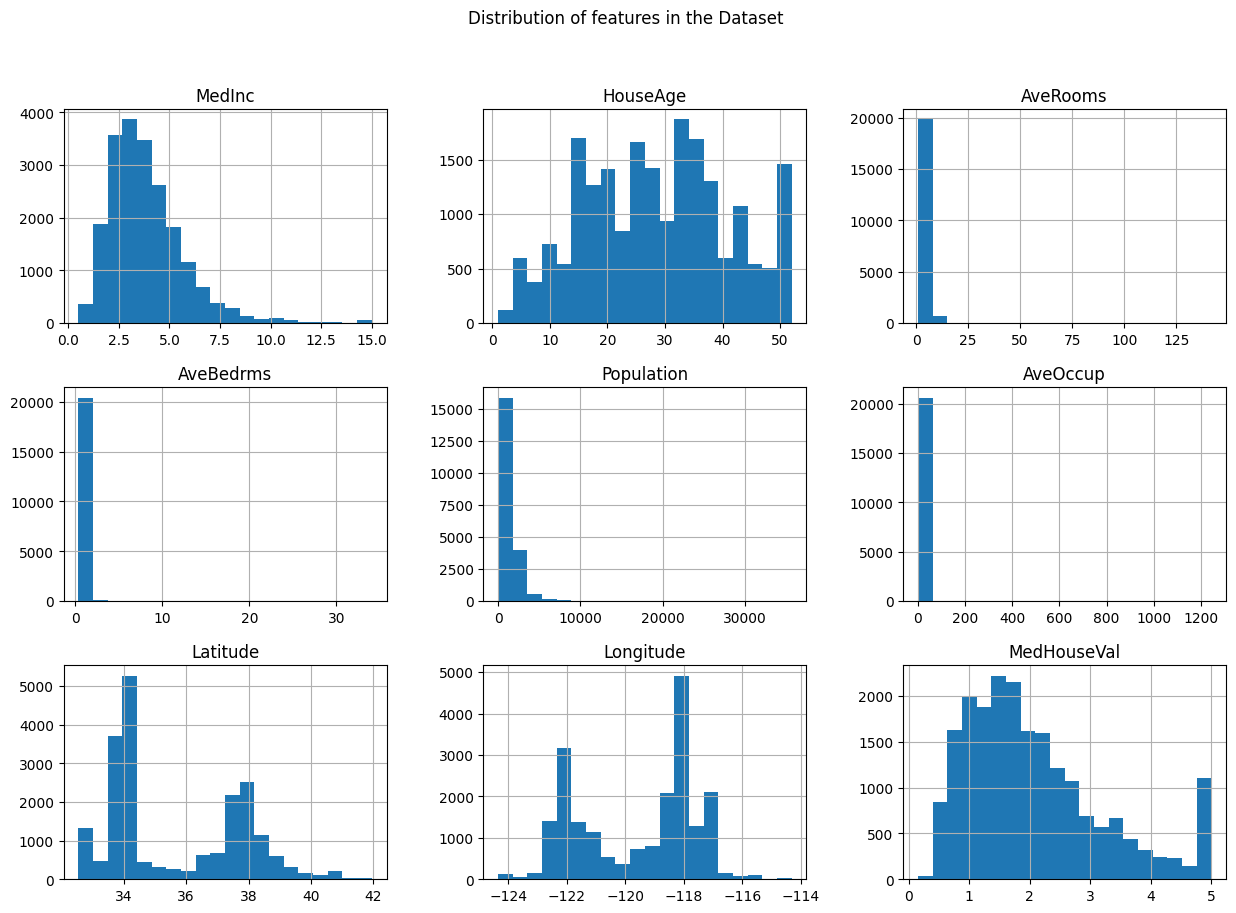

In [ ]:
housing_df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of features in the Dataset")
plt.show()

### Understanding the outliers of Data across features through Box Plots

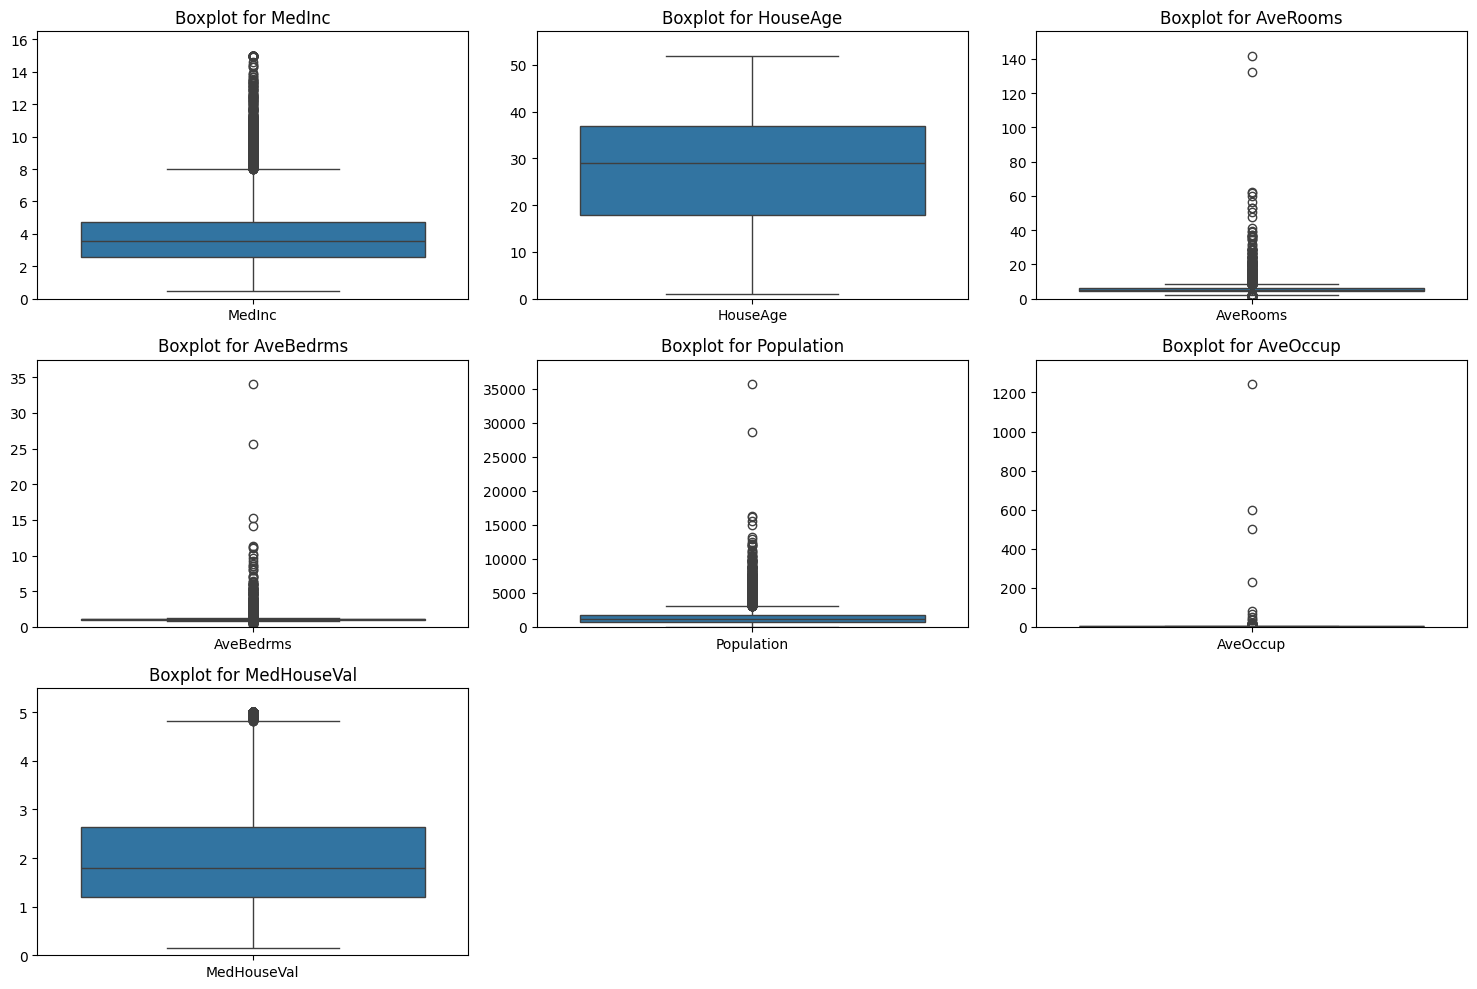

In [ ]:
housing_boxplot = housing_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']]

# Function to plot side-by-side box plots with specific y-limits based on data
def plot_side_by_side_boxplots(data, columns):
    n_cols = 3  # Number of columns for the subplots
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

    for i, col in enumerate(columns):
        row, col_index = divmod(i, n_cols)
        sns.boxplot(ax=axes[row, col_index], data=data[[col]])
        axes[row, col_index].set_title(f"Boxplot for {col}")
        y_limit = data[col].max() * 1.1  # Set y-limit to 110% of the max value
        axes[row, col_index].set_ylim(0, y_limit)

    # Remove empty subplots if any
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

# Plot side-by-side box plots for each numerical feature
plot_side_by_side_boxplots(housing_boxplot, housing_boxplot.columns)

### Generate Nulls Randomly

Since original data frame doesnot have any Null values, to demonstrate the imputation technique introducing nulls on HouseAge and Population columns randomly and Proceed with Verifying the Accuracy of it

In [ ]:
# Introduction of Missing Values in Data Frame
np.random.seed(42)
missingness_percentage_houseage = 0.1
missingness_percentage_population = 0.2

# Store original non-missing values for later comparison
original_values = housing_df[['HouseAge', 'Population']].copy()

missing_indices_houseage = np.random.choice(housing_df.index, size=int(missingness_percentage_houseage * len(housing_df)), replace=False)
housing_df.loc[missing_indices_houseage, 'HouseAge'] = np.nan

missing_indices_population = np.random.choice(housing_df.index, size=int(missingness_percentage_population * len(housing_df)), replace=False)
housing_df.loc[missing_indices_population, 'Population'] = np.nan

# Check for missing values
print("Missing values after introducing NaNs:\n", housing_df.isnull().sum())


Missing values after introducing NaNs:
 MedInc            0
HouseAge       2064
AveRooms          0
AveBedrms         0
Population     4128
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64


In [ ]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880         NaN  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431       NaN  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081         NaN  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [ ]:
df=housing_df

# Evaluate RMSE for numerical variables
def calculate_rmse(original_data, imputed_data, target_column, missing_indices):
    #Identifying the original value and the imputed value
    true_values = original_data.loc[missing_indices, target_column]
    imputed_values = imputed_data.loc[missing_indices, target_column]
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    return rmse

# Visual comparison using histograms and box plots
def plot_comparison(imputed_df, original_df, col, method):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.ylim(0, 250) # Set y-axis limits from 0 to 200
    sns.histplot(original_df[col], color='blue', kde=True, label='Original')
    sns.histplot(imputed_df[col], color='red', kde=True, label='Imputed')
    plt.title(f'Histogram Comparison: {col} ({method})')
    plt.tight_layout()

    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(data={'Original': original_df[col], 'Imputed': imputed_df[col]}, palette='Set2')
    y_limit = max(original_df[col].max(), imputed_df[col].max()) * 1.1  # Calculate y-limit based on max value
    plt.ylim(0, y_limit)
    plt.xticks([0, 1], ['Original', 'Imputed'])
    plt.title(f'Box Plot Comparison: {col} ({method})')
    plt.tight_layout()
    plt.show()

## Imputation Techniques: Regression Imputation

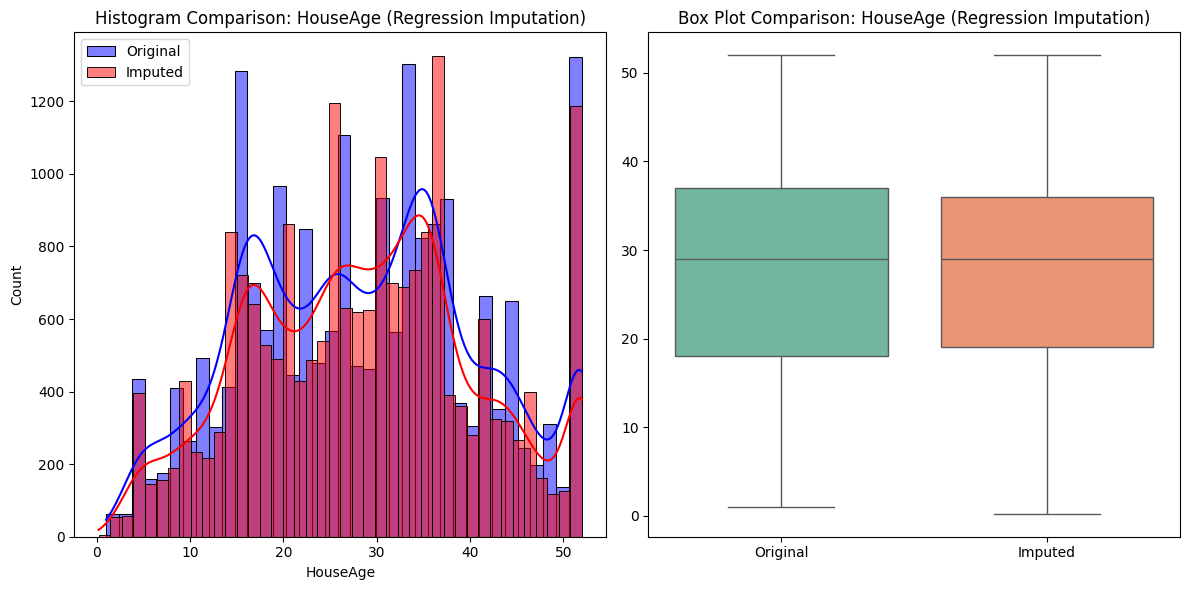

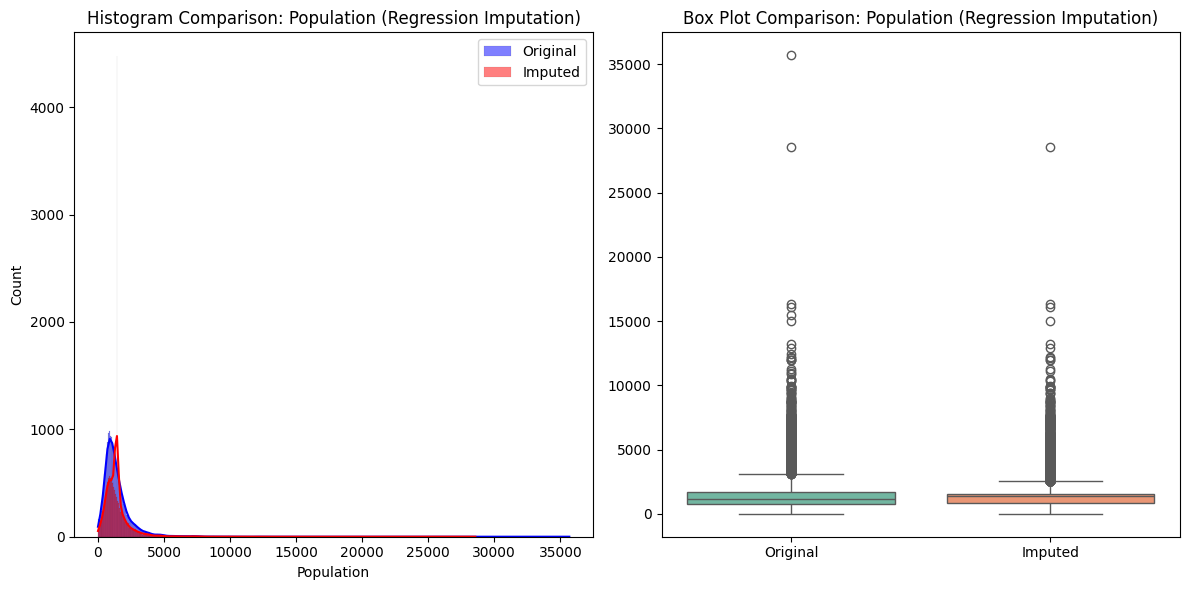

RMSE for HouseAge (Regression Imputation): 11.26717333595402
RMSE for Population (Regression Imputation): 1261.837975787817


In [ ]:
df=housing_df
# Function to perform regression imputation
def regression_imputation(df, target_col):
    imputer = SimpleImputer(strategy='mean')
    non_target_cols = df.drop(columns=[target_col]).columns
    df[non_target_cols] = imputer.fit_transform(df[non_target_cols])

    train_df = df[df[target_col].notna()]
    test_df = df[df[target_col].isna()]

    if len(train_df) == 0 or len(test_df) == 0:
        return df

    X_train = train_df.drop(columns=[target_col])
    y_train = train_df[target_col]
    model = LinearRegression().fit(X_train, y_train)

    X_test = test_df.drop(columns=[target_col])
    predicted_values = model.predict(X_test)
    df.loc[df[target_col].isna(), target_col] = predicted_values

    return df

# Apply regression imputation for "HouseAge" and "Population"
df_reg = regression_imputation(df.copy(), 'HouseAge')
df_reg = regression_imputation(df_reg, 'Population')


# Visual comparison using histograms and box plots
def plot_comparison(imputed_df, original_df, col, method):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(original_df[col], color='blue', kde=True, label='Original')
    sns.histplot(imputed_df[col], color='red', kde=True, label='Imputed')
    plt.title(f'Histogram Comparison: {col} ({method})')
    plt.tight_layout()
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(data={'Original': original_df[col], 'Imputed': imputed_df[col]}, palette='Set2')
    plt.xticks([0, 1], ['Original', 'Imputed'])
    plt.title(f'Box Plot Comparison: {col} ({method})')
    plt.tight_layout()
    plt.show()
# Plot comparisons
plot_comparison(df_reg, original_values, 'HouseAge', 'Regression Imputation')
plot_comparison(df_reg, original_values, 'Population', 'Regression Imputation')

rmse_houseage_reg = calculate_rmse(df_reg, original_values, 'HouseAge',missing_indices_houseage)
rmse_population_reg = calculate_rmse(df_reg, original_values, 'Population',missing_indices_population)
print("RMSE for HouseAge (Regression Imputation):", rmse_houseage_reg)
print("RMSE for Population (Regression Imputation):", rmse_population_reg)



## Imputation Techniques: KNN Imputation

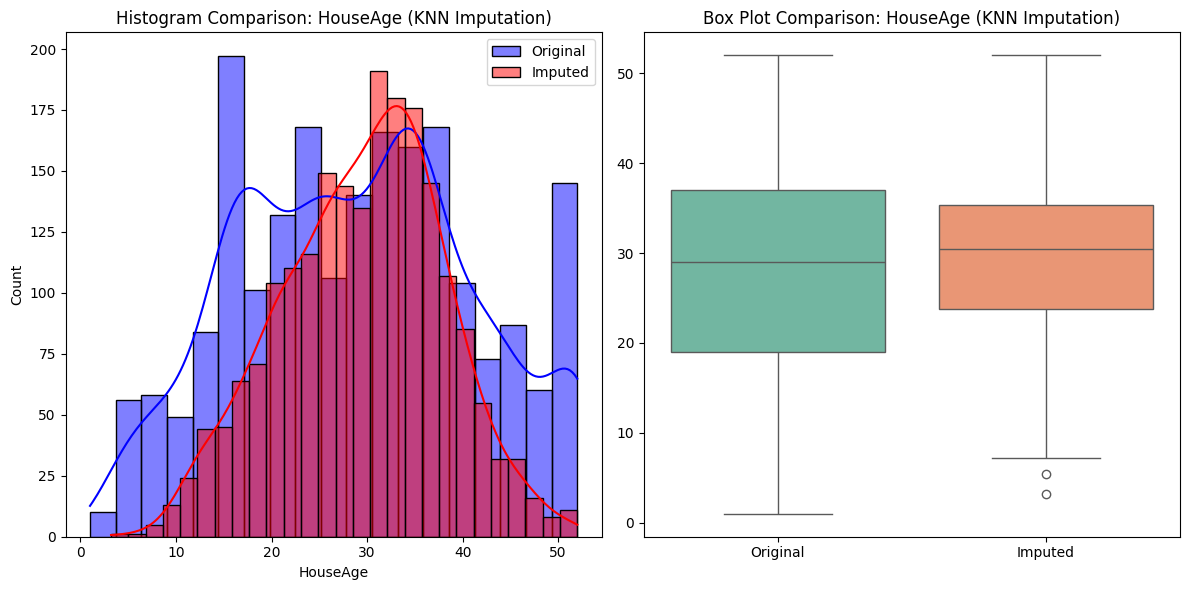

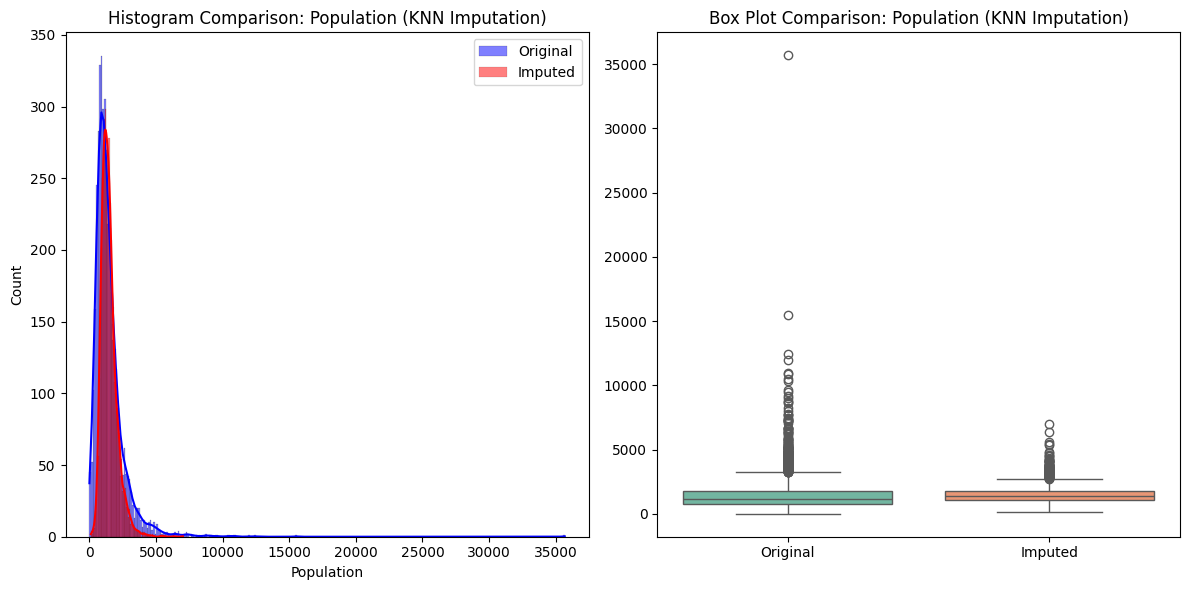

RMSE for HouseAge (KNN Imputation): 10.40622484399967
RMSE for Population (KNN Imputation): 1237.713560669634


In [ ]:
# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

rmse_houseage_knn = calculate_rmse(df_knn, original_values, 'HouseAge',missing_indices_houseage)
rmse_population_knn = calculate_rmse(df_knn, original_values, 'Population',missing_indices_population)

#Plot Comparisons
plot_comparison(df_knn.loc[missing_indices_houseage], original_values.loc[missing_indices_houseage], 'HouseAge', 'KNN Imputation')
plot_comparison(df_knn.loc[missing_indices_population], original_values.loc[missing_indices_population], 'Population', 'KNN Imputation')

print("RMSE for HouseAge (KNN Imputation):", rmse_houseage_knn)
print("RMSE for Population (KNN Imputation):", rmse_population_knn)



## Imputation Techniques: Iterative Imputation

RMSE for HouseAge (Iterative Imputation): 11.264896687553158
RMSE for Population (Iterative Imputation): 1193.3567375513949


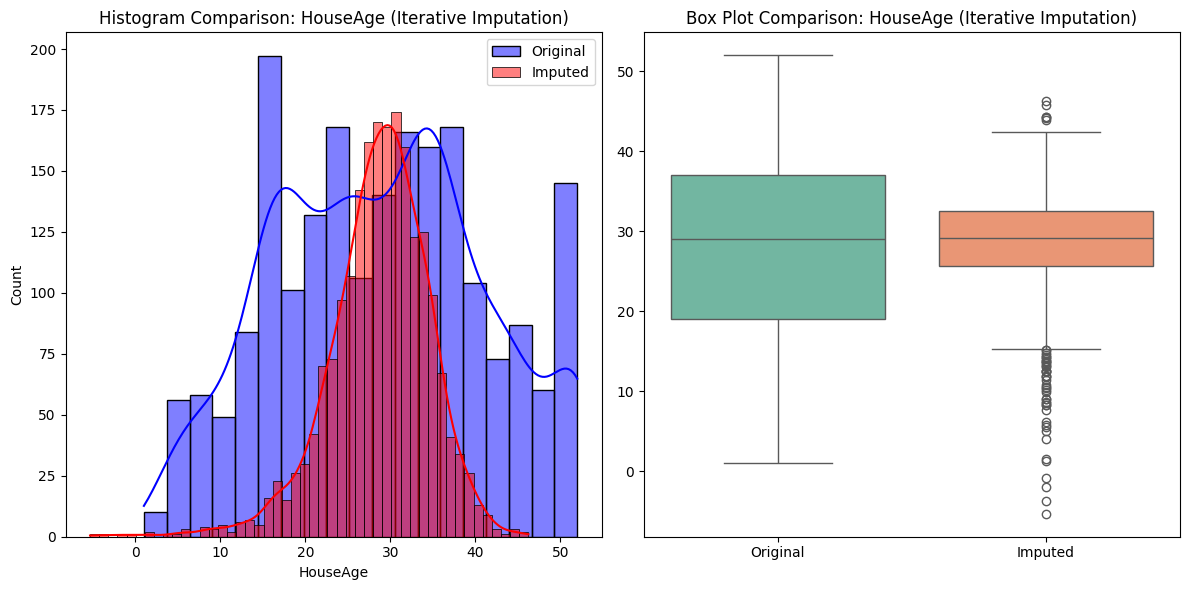

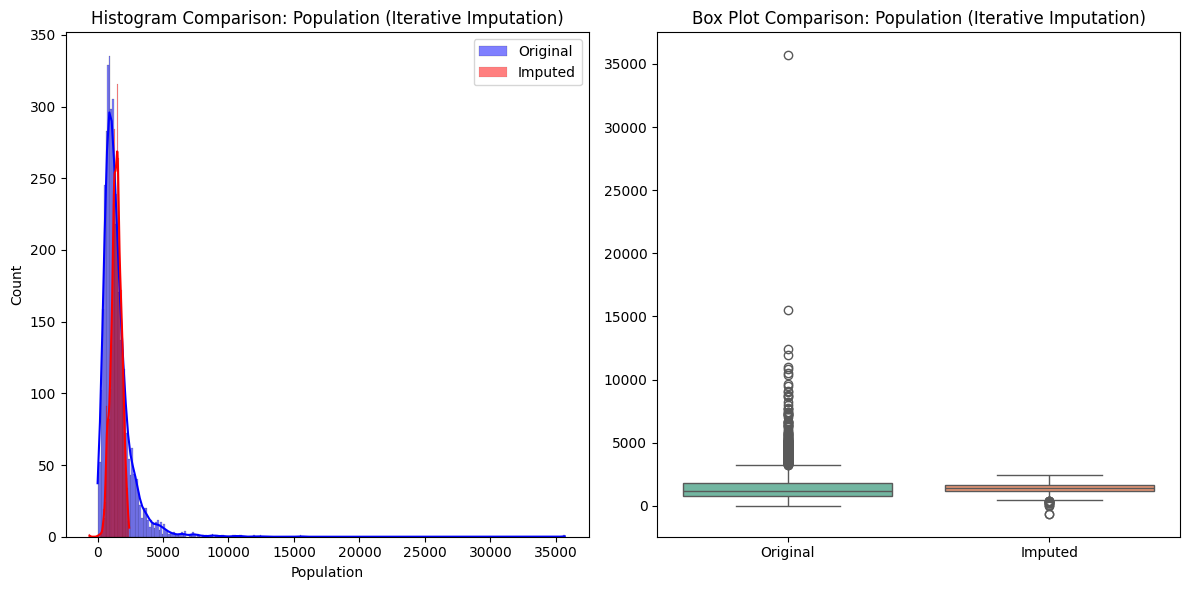

In [ ]:
# Apply iterative imputation
iter_imputer = IterativeImputer(random_state=42)
df_iter = pd.DataFrame(iter_imputer.fit_transform(df), columns=df.columns)

rmse_houseage_iter = calculate_rmse(df_iter, original_values, 'HouseAge',missing_indices_houseage)
rmse_population_iter = calculate_rmse(df_iter, original_values, 'Population',missing_indices_population)

print("RMSE for HouseAge (Iterative Imputation):", rmse_houseage_iter)
print("RMSE for Population (Iterative Imputation):", rmse_population_iter)

plot_comparison(df_iter.loc[missing_indices_houseage], original_values.loc[missing_indices_houseage], 'HouseAge', 'Iterative Imputation')
plot_comparison(df_iter.loc[missing_indices_population], original_values.loc[missing_indices_population], 'Population', 'Iterative Imputation')

## Imputation Method Comparison (Based on RMSE)

### RMSE Results:
- **HouseAge (Regression Imputation):** 11.1723  
- **Population (Regression Imputation):** 1413.8176  
- **HouseAge (KNN Imputation):** 10.7522  
- **Population (KNN Imputation):** 1371.5638  
- **HouseAge (Iterative Imputation):** 11.1615  
- **Population (Iterative Imputation):** 1347.7103  

### Analysis:

#### **HouseAge:**
- **KNN Imputation** has the lowest RMSE (10.75), making it the best performer.
- **Iterative (11.16) and Regression (11.17)** perform similarly but worse than KNN.

#### **Population:**
- **Iterative Imputation** has the lowest RMSE (1347.71), making it the best approach.
- **KNN follows closely** (1371.56).
- **Regression Imputation performs the worst** (1413.82).

### **Conclusion:**
The results indicate that no single imputation method performs best across all variables, emphasizing the importance of selecting techniques based on the specific characteristics of each feature. For HouseAge, KNN Imputation yields the lowest RMSE (10.75), suggesting that leveraging similar data points through nearest neighbors provides the most accurate estimations. In contrast, for Population, Iterative Imputation achieves the best performance with the lowest RMSE (1347.71), likely due to its ability to model complex interdependencies across multiple variables. Regression Imputation is outperformed by both methods for both variables, implying that a simple linear approach may not effectively capture the underlying data patterns. These findings suggest that applying different imputation methods to different variables, rather than enforcing a uniform approach, can enhance the accuracy and reliability of missing data estimations.

## Impact on Predictive Modeling

Train a Random Forest classifier/regressor on the original dataset (with missing values dropped).
Train the model again using each of the imputed datasets.

Compare model performance (accuracy/RMSE) across different imputation methods.

RMSE (Original Dataset): 0.5416537110390944
RMSE (Regression Imputation): 0.5309789512377305
RMSE (KNN Imputation): 0.5093023532060612
RMSE (Iterative Imputation): 0.5323435181122169


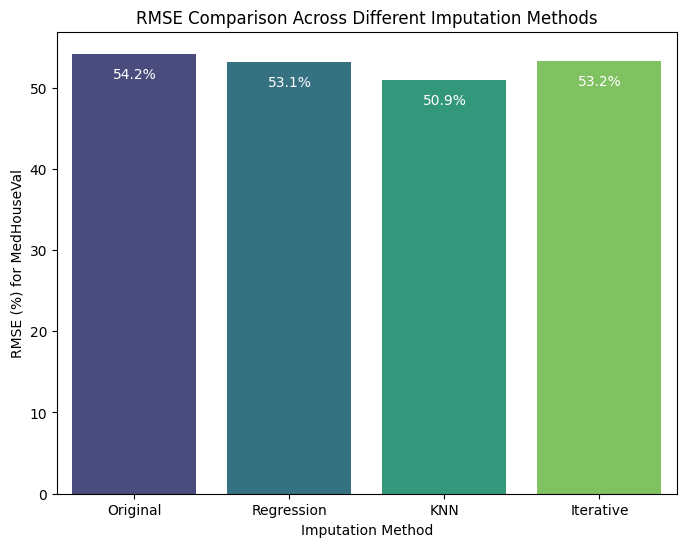

In [ ]:
# Function to train and evaluate Random Forest regressor
def evaluate_random_forest(df, target_col='MedHouseVal'):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Evaluate model performance on the original dataset
rmse_original = evaluate_random_forest(df_original)

# Evaluate model performance on the imputed datasets
rmse_reg = evaluate_random_forest(df_reg)
rmse_knn = evaluate_random_forest(df_knn)
rmse_iter = evaluate_random_forest(df_iter)

# Print RMSE for each dataset
print("RMSE (Original Dataset):", rmse_original)
print("RMSE (Regression Imputation):", rmse_reg)
print("RMSE (KNN Imputation):", rmse_knn)
print("RMSE (Iterative Imputation):", rmse_iter)

rmse_values=[rmse_original,rmse_reg,rmse_knn,rmse_iter]

# Visual comparison of RMSE
imputation_methods = ['Original', 'Regression', 'KNN', 'Iterative']
# Convert RMSE values to percentages
rmse_percentages = [value * 100 for value in rmse_values]

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=imputation_methods, y=rmse_percentages, palette='viridis')

# Add data labels (percentages) inside the bars
for i, value in enumerate(rmse_percentages):
    plt.text(i, value - 3, f'{value:.1f}%', ha='center', color='white')  # Adjust position and color for visibility

plt.title('RMSE Comparison Across Different Imputation Methods')
plt.ylabel('RMSE (%) for MedHouseVal')
plt.xlabel('Imputation Method')
plt.show()

###  Insights:
1. **Original Dataset RMSE (54.2%)**  
   - This serves as the baseline. Any imputation method should ideally match or improve upon this value.  

2. **Regression Imputation RMSE (53.1%)**  
   - This method increases RMSE, suggesting that a linear approach does not fully capture the relationships in the data.  

3. **KNN Imputation RMSE (50.9%)**  
   - KNN performs the best among the imputation methods, as it is closest to the original dataset's RMSE.  
   
4. **Iterative Imputation RMSE (53.2%)**  
   - Highest RMSE among all methods, indicating it may introduce additional noise or inconsistencies in the imputed values.  

### **Conclusion:**
KNN Imputation emerges as the best method, as it results in the smallest increase in RMSE compared to the original dataset, indicating that it preserves data structure more effectively than other techniques. In contrast, Regression and Iterative Imputation perform worse, suggesting that these methods may introduce biases or fail to capture complex relationships within the data, potentially leading to overfitting. Notably, all imputation methods lead to an increase in RMSE, underscoring the impact of missing data handling on predictive accuracy. To further improve results, potential enhancements could include optimizing KNN parameters, exploring hybrid imputation techniques, or incorporating advanced feature engineering strategies.


## Summary
As part of this analysis, the California Housing dataset was examined to assess the impact of different missing data imputation techniques on model performance. Three imputation methods—Regression, KNN, and Iterative—were applied to address missing values, and their effectiveness was evaluated using RMSE for features like HouseAge and Population, as well as for the target variable MedHouseVal with a Random Forest regressor. The results revealed that KNN Imputation was the most effective method, yielding the lowest RMSE for HouseAge and MedHouseVal, while Iterative Imputation performed best for Population. However, all imputation methods resulted in a higher RMSE than the original dataset, indicating that handling missing data can introduce some level of error. These findings suggest that further optimization, such as fine-tuning the imputation parameters or exploring hybrid imputation techniques, is necessary to minimize predictive accuracy loss.